# HOUSE PRICE PREDICTION

Here we are predicting the House Price using different ML techniques.
Determine the housing prices for new sellers as well as buyers to estiamte the profitability of deal 

## IMPORTING THE NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## A] IMPORTING DATASET

In [2]:
#FOR THE DISPLAY OF ALL THE COLUMNS

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

#WE HAVE TWO DATASET TRAIN AND TEST SO WE NEED TO IMPORT BOTH 

train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

### Reading First Five Rows  of Dataset

FIRST FIVE ROWS

In [3]:
#train.head()

In [4]:
#test.head()

Here we drop ID column since it is not necessary for model training

In [5]:
train.drop(columns="Id", inplace=True)

In [6]:
test.drop(columns="Id", inplace=True)

### Dimensions (Shape, Size)

SHAPE

In [7]:
#print("Shape of the train data is: ",train.shape)
#print("Shape of the test data is: ",test.shape)

Train data composed of 1480 rows and 81 columns which consisted of 80 independent and one dependent variable.

Test data composed of 1480 rows and 80 columns which consisted of 80 independent variables. Here one variable(dependent) is less since it is testing data.

SIZE

In [8]:
#print("Size of the train data is: ",train.size)
#print("Size of the test data is: ",test.size)

In [9]:
int_features1 = train.select_dtypes(include=["int64"]).columns

print("Total number of integer features : ", int_features1.shape[0])

print("Integer feature names: ",int_features1.tolist())

Total number of integer features :  34
Integer feature names:  ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [10]:
float_features1 = train.select_dtypes(include=["float64"]).columns

print("Total number of floating features : ", float_features1.shape[0])

print("Floating feature names: ",float_features1.tolist())

Total number of floating features :  3
Floating feature names:  ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [11]:
cat_features1 = train.select_dtypes(include=["object"]).columns

print("Total number of categorical features : ", cat_features1.shape[0])

print("Categorical feature names: ",cat_features1.tolist())

Total number of categorical features :  43
Categorical feature names:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [12]:
int_features2 = test.select_dtypes(include=["int64"]).columns

print("Total number of integer features : ", int_features2.shape[0])

print("Integer feature names: ",int_features2.tolist())

Total number of integer features :  25
Integer feature names:  ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [13]:
float_features2 = test.select_dtypes(include=["float64"]).columns

print("Total number of floating features : ", float_features2.shape[0])

print("Floating feature names: ",float_features2.tolist())

Total number of floating features :  11
Floating feature names:  ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']


In [14]:
cat_features2 = test.select_dtypes(include=["object"]).columns

print("Total number of categorical features : ", cat_features2.shape[0])

print("Categorical feature names: ",cat_features2.tolist())

Total number of categorical features :  43
Categorical feature names:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


## B] DATA CLEANING
To get null value count

In [15]:
# For Train Dataset
# show only non-zero missing values

train.isnull().sum()[train.isnull().sum()!=0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [16]:
# For Test Dataset
# show only non-zero missing values

test.isnull().sum()[test.isnull().sum()!=0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

### Drop Columns

In [17]:
train["Alley"].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In Garage we have "NA" means No Garage so we cannot consider it as missing value so cannot remove Garage  

From above we conclude that no values we can drop since all features are of euqal importance
 
Since their No Garage type of option in No Garage then NO GarageYr built then No Garage finish then No Garage quality 

### Imputing missing values of both dataset train as well as test dataset

In [18]:
## backup of original data

df_test = test.copy()
print("Shape of original test data is: ",df_test.shape)

df_train = train.copy()
print("Shape of original train data is: ",df_train.shape)

Shape of original test data is:  (1459, 79)
Shape of original train data is:  (1460, 80)


#### Handling MS Zoning

In [19]:
#test["MSZoning"].value_counts()

In case of categorical we use Mode, in case of numerical we use Mean or Median

In above condition we can use only when their distribution is normally distributed but if not normally distributed then we cannot use so

If right/left skewed then Mean is biased beacuse outlier are on one side i.e left or right side so in case we can use Median

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

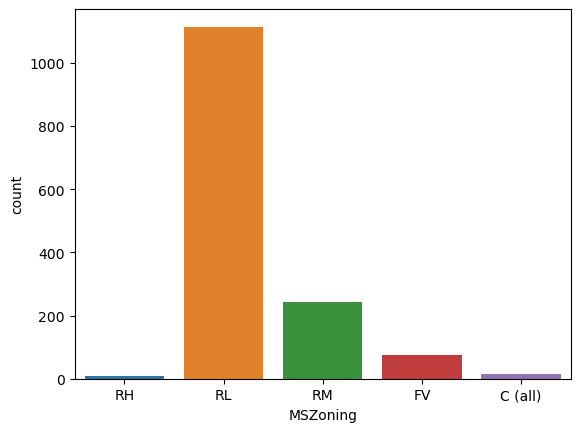

In [20]:
sns.countplot(test["MSZoning"])

The above bar graph indicated that is is right skewed

In [21]:
test.MSZoning.fillna(test.MSZoning.mode()[0], inplace=True)

test["MSZoning"].isnull().sum()

0

#### Alley

In [22]:
#train["Alley"].unique()

In [23]:
#here inputed with constant value NA because here it is not missing value since here NA is category

#here we have stored null value it in one variable
alley_train_const = "No alley access" 

#Here we have replaced nan value 
train["Alley"].replace(np.nan, alley_train_const, inplace=True)

train["Alley"].isnull().sum()

0

In [24]:
#find unique value count 
#test["Alley"].unique()

In [25]:
alley_test_const = "No alley access" 

test["Alley"].replace(np.nan, alley_test_const, inplace=True)

test["Alley"].isnull().sum()

0

#### LotFrontage

In [26]:
def boxHistPlottrain(train, figsize=(16,5)):
    plt.figure(figsize=figsize)
    plt.subplot(121)
    sns.boxplot(train)
    plt.subplot(122)
    sns.distplot(train)

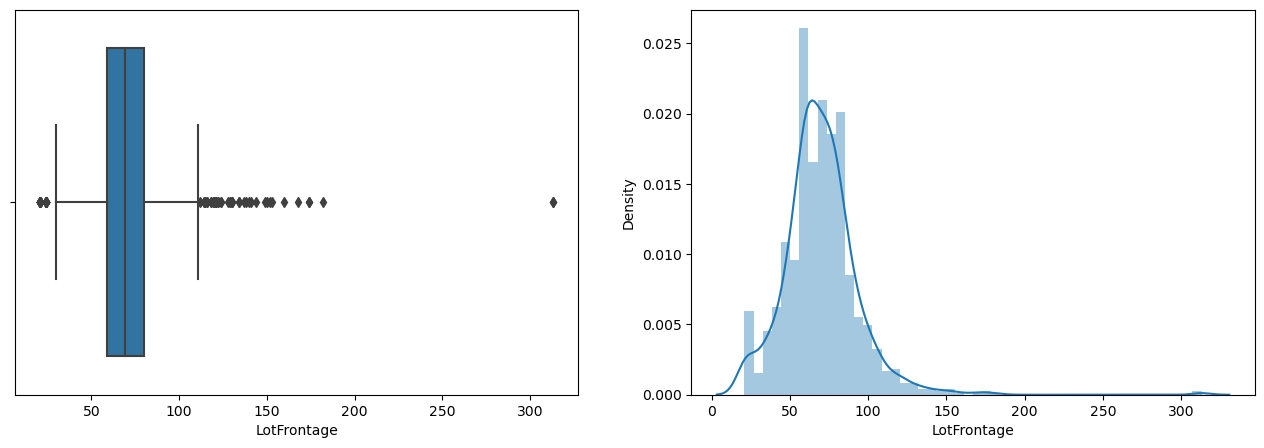

In [27]:
boxHistPlottrain(train["LotFrontage"])

Here from above BoxPlot we see that their are many outliers present & also from Histogram we observe that it is right skewed so here we use median instead of mean to impute missing values 

In [28]:
train.LotFrontage.fillna(train.LotFrontage.median(), inplace=True)

train["LotFrontage"].isnull().sum()

0

In [29]:
def boxHistPlottest(test, figsize=(16,5)):
    plt.figure(figsize=figsize)
    plt.subplot(121)
    sns.boxplot(test)
    plt.subplot(122)
    sns.distplot(test)

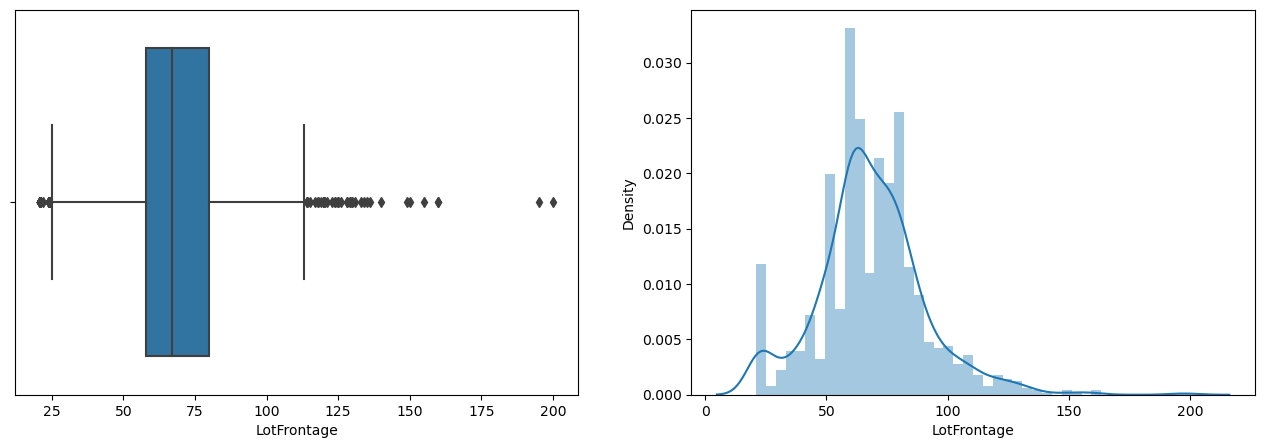

In [30]:
boxHistPlottest(test["LotFrontage"])

In [31]:
test.LotFrontage.fillna(test.LotFrontage.median(), inplace=True)

test["LotFrontage"].isnull().sum()

0

#### Utilities

In [32]:
test["Utilities"].value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [33]:
test.Utilities.fillna(test.Utilities.mode()[0], inplace=True)

test["Utilities"].isnull().sum()

0

#### Exterior1st & Exterior2nd

In [34]:
#test["Exterior1st"].value_counts()

In [35]:
#test["Exterior2nd"].value_counts()

In [36]:
test.Exterior1st.fillna(test.Exterior1st.mode()[0], inplace=True)

test["Exterior1st"].isnull().sum()

0

In [37]:
test.Exterior2nd.fillna(test.Exterior2nd.mode()[0], inplace=True)

test["Exterior2nd"].isnull().sum()

0

#### MasVnrType & MasVnrArea  

In [38]:
#train["MasVnrType"].value_counts()

In [39]:
train.MasVnrType.fillna(train.MasVnrType.mode()[0], inplace=True)

train["MasVnrType"].isnull().sum()

0

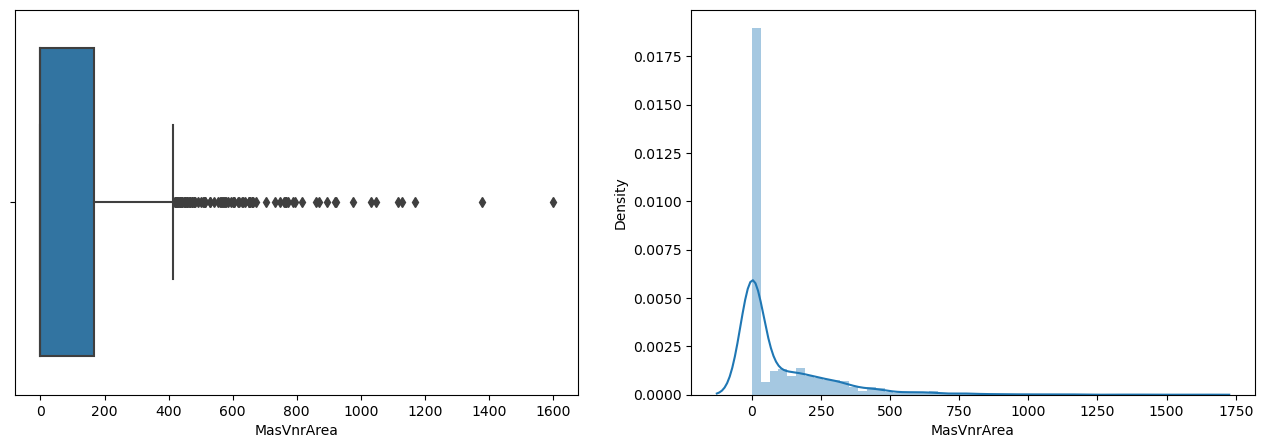

In [40]:
boxHistPlottrain(train["MasVnrArea"])

Here we observe that the maximun value here is 0 which means we can impute 0 value here

In [41]:
train.MasVnrArea.fillna(train.MasVnrArea.median(), inplace=True)

train["MasVnrArea"].isnull().sum()

0

In [42]:
#test["MasVnrType"].value_counts()

In [43]:
test.MasVnrType.fillna(test.MasVnrType.mode()[0], inplace=True)

test["MasVnrType"].isnull().sum()

0

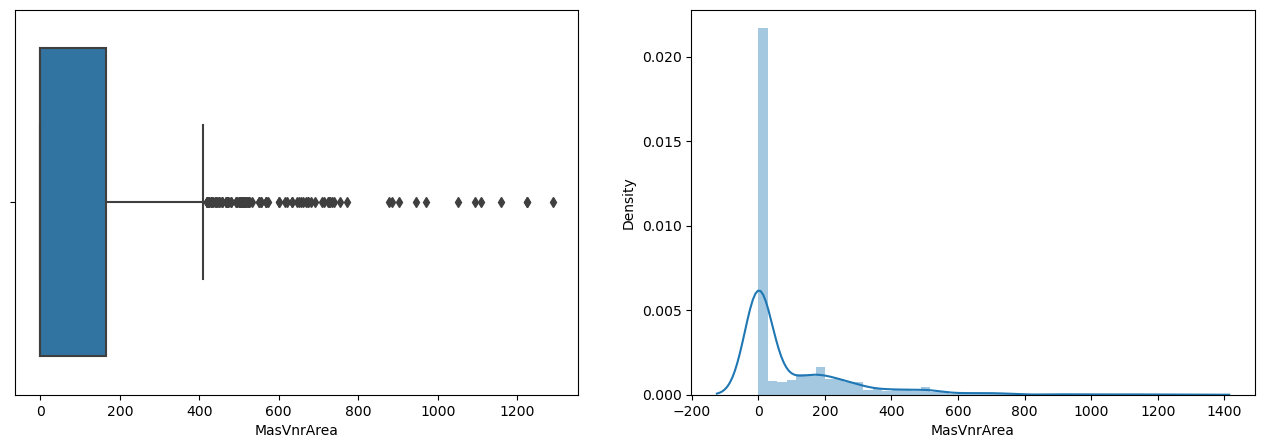

In [44]:
boxHistPlottrain(test["MasVnrArea"])

In [45]:
test.MasVnrArea.fillna(test.MasVnrArea.median(), inplace=True)

test["MasVnrArea"].isnull().sum()

0

#### BSMT VARIABLE

In [46]:
cat_bsmt_feat_test = [
"BsmtQual",      
"BsmtCond",         
"BsmtExposure",     
"BsmtFinType1",    
"BsmtFinType2"] 

num_bsmt_feat_test = ["BsmtFinSF1",     
"BsmtFinSF2",      
"BsmtUnfSF",        
"TotalBsmtSF",      
"BsmtFullBath",     
"BsmtHalfBath"]     

In [47]:
#sns.heatmap(test[cat_bsmt_feat_test].isnull())

In [48]:
for feat in cat_bsmt_feat_test:
    print("Value count of test feature: ",test[feat].unique())

Value count of test feature:  ['TA' 'Gd' 'Ex' 'Fa' nan]
Value count of test feature:  ['TA' 'Po' 'Fa' 'Gd' nan]
Value count of test feature:  ['No' 'Gd' 'Mn' 'Av' nan]
Value count of test feature:  ['Rec' 'ALQ' 'GLQ' 'Unf' 'BLQ' 'LwQ' nan]
Value count of test feature:  ['LwQ' 'Unf' 'Rec' 'BLQ' 'GLQ' 'ALQ' nan]


In [49]:
bsmt_test_const="No Basement"
for feat in cat_bsmt_feat_test:
    test[feat].replace(np.nan, bsmt_test_const, inplace=True)

In [50]:
test[cat_bsmt_feat_test].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

In [51]:
#sns.heatmap(test[num_bsmt_feat_test].isnull())

In [52]:
test_bsmt = test[cat_bsmt_feat_test + num_bsmt_feat_test]
test_bsmt[test_bsmt.isnull().any(axis=1)]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
660,No Basement,No Basement,No Basement,No Basement,No Basement,NaN,NaN,NaN,NaN,NaN,NaN
728,No Basement,No Basement,No Basement,No Basement,No Basement,0.0,0.0,0.0,0.0,NaN,NaN


The value of float feature value is 0 where in categorical it was null

We replace it with NA so our decision was right 

Why because if BsmtFinSF1 where the sq feet was 0 which means no quality rating means no finish area

In [53]:
#fill numerical value 

bsmt_test_num = 0
for feat in num_bsmt_feat_test:
    test[feat].replace(np.nan, bsmt_test_num, inplace=True)

In [54]:
test[num_bsmt_feat_test].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

In [55]:
cat_bsmt_feat_train=[
"BsmtQual",      
"BsmtCond",         
"BsmtExposure",     
"BsmtFinType1",    
"BsmtFinType2"]    

In [56]:
#sns.heatmap(test[cat_bsmt_feat_train].isnull())

In [57]:
for feat in cat_bsmt_feat_train:
    print("Value count of train feature: ",train[feat].unique())

Value count of train feature:  ['Gd' 'TA' 'Ex' nan 'Fa']
Value count of train feature:  ['TA' 'Gd' nan 'Fa' 'Po']
Value count of train feature:  ['No' 'Gd' 'Mn' 'Av' nan]
Value count of train feature:  ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
Value count of train feature:  ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']


Here above we get that the nan is not the actual missing value but its the category "No Basement" in the variables 

In [58]:
bsmt_train_const="No Basement"
for feat in cat_bsmt_feat_train:
    train[feat].replace(np.nan, bsmt_train_const, inplace=True)

In [59]:
train[cat_bsmt_feat_train].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

#### Electrical 

In [60]:
#electrical is categorical & KitchenQual from numerical 

train["Electrical"].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [61]:
train.Electrical.fillna(train.Electrical.mode()[0], inplace=True)

train["Electrical"].isnull().sum()

0

#### KitchenQual

In [62]:
test["KitchenQual"].value_counts()

TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64

In [63]:
test.KitchenQual.fillna(test.KitchenQual.mode()[0], inplace=True)

test["KitchenQual"].isnull().sum()

0

#### HANDLING REMAINING CAT FEATURES

In [64]:
test["Functional"].value_counts()

Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [65]:
test.Functional.fillna(test.Functional.mode()[0], inplace=True)

test["Functional"].isnull().sum()

0

In [66]:
test["SaleType"].value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
Con         3
ConLw       3
Name: SaleType, dtype: int64

In [67]:
test.SaleType.fillna(test.SaleType.mode()[0], inplace=True)

test["SaleType"].isnull().sum()

0

In [68]:
other_cat_feat_test = ["FireplaceQu", "PoolQC", "Fence", "MiscFeature"]

for feat in other_cat_feat_test:
    print("Value count of test feature: ",test[feat].unique())

Value count of test feature:  [nan 'TA' 'Gd' 'Po' 'Fa' 'Ex']
Value count of test feature:  [nan 'Ex' 'Gd']
Value count of test feature:  ['MnPrv' nan 'GdPrv' 'GdWo' 'MnWw']
Value count of test feature:  [nan 'Gar2' 'Shed' 'Othr']


In [69]:
FireplaceQu_test_const = "No Fireplace" 

test["FireplaceQu"].replace(np.nan, FireplaceQu_test_const, inplace=True)

test["FireplaceQu"].isnull().sum()

0

In [70]:
PoolQC_test_const = "No Pool" 

test["PoolQC"].replace(np.nan, PoolQC_test_const, inplace=True)

test["PoolQC"].isnull().sum()

0

In [71]:
Fence_test_const = "No Fence" 

test["Fence"].replace(np.nan, Fence_test_const, inplace=True)

test["Fence"].isnull().sum()

0

In [72]:
MiscFeature_test_const = "None category" 

test["MiscFeature"].replace(np.nan, MiscFeature_test_const, inplace=True)

test["MiscFeature"].isnull().sum()

0

In [73]:
FireplaceQu_train_const = "No Fireplace" 

train["FireplaceQu"].replace(np.nan, FireplaceQu_train_const, inplace=True)

train["FireplaceQu"].isnull().sum()

0

In [74]:
PoolQC_train_const = "No Pool" 

train["PoolQC"].replace(np.nan, PoolQC_train_const, inplace=True)

train["PoolQC"].isnull().sum()

0

In [75]:
Fence_train_const = "No Fence" 

train["Fence"].replace(np.nan, Fence_train_const, inplace=True)

train["Fence"].isnull().sum()

0

In [76]:
MiscFeature_train_const = "None category" 

train["MiscFeature"].replace(np.nan, MiscFeature_train_const, inplace=True)

train["MiscFeature"].isnull().sum()

0

#### GARAGE VARIABLE 

In [77]:
cat_garage_feat_test = ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]

for feat in cat_garage_feat_test:
    print("Value count of test feature: ",test[feat].unique())

Value count of test feature:  ['Attchd' 'Detchd' 'BuiltIn' nan 'Basment' '2Types' 'CarPort']
Value count of test feature:  ['Unf' 'Fin' 'RFn' nan]
Value count of test feature:  ['TA' nan 'Fa' 'Gd' 'Po']
Value count of test feature:  ['TA' nan 'Fa' 'Gd' 'Po' 'Ex']


In [78]:
garage_test_const = "No Garage"
for feat in cat_garage_feat_test:
    test[feat].replace(np.nan, garage_test_const, inplace=True)

test[cat_garage_feat_test].isnull().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [79]:
num_garage_feat_test = ["GarageYrBlt", "GarageCars", "GarageArea"]

In [80]:
garage_test_num = 0
for feat in num_garage_feat_test:
    test[feat].replace(np.nan, garage_test_num, inplace=True)

test[num_garage_feat_test].isnull().sum()

GarageYrBlt    0
GarageCars     0
GarageArea     0
dtype: int64

In [81]:
cat_garage_feat_train = ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]

for feat in cat_garage_feat_train:
    print("Value count of train feature: ",train[feat].unique())

Value count of train feature:  ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
Value count of train feature:  ['RFn' 'Unf' 'Fin' nan]
Value count of train feature:  ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
Value count of train feature:  ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


In [82]:
garage_train_const = "No Garage"
for feat in cat_garage_feat_train:
    train[feat].replace(np.nan, garage_train_const, inplace=True)

train[cat_garage_feat_train].isnull().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [83]:
num_garage_feat_train = ["GarageYrBlt"]

In [84]:
garage_train_num = 0
for feat in num_garage_feat_train:
    train[feat].replace(np.nan, garage_train_num, inplace=True)

train[num_garage_feat_train].isnull().sum()

GarageYrBlt    0
dtype: int64

In [85]:
#test.isnull().sum()

In [86]:
#train.isnull().sum()

### Conversion of Dtypes

Since we can model using only numeric values we need to transform the categorical data into numeriacl one which is why we have to use Label Encoder

In [87]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

In [88]:
for col in cat_features1:
    train[col] = labelencoder.fit_transform(train[col])

In [89]:
for col in cat_features2:
    test[col] = labelencoder.fit_transform(test[col])

## C] BASIC MODEL

In [90]:
#X1 = train.iloc[:,:-1].values
#Y1 = train.iloc[:,-1].values

X1 = train.drop(columns = "SalePrice")
Y1 = train["SalePrice"]

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1,test_size=0.2)

In [93]:
X1_train.shape, Y1_train.shape, X1_test.shape, Y1_test.shape

((1168, 79), (1168,), (292, 79), (292,))

In [94]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [95]:
## Applying multiple regression model to see which is the best 
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

#### Linear Regression

In [96]:
model1 = LinearRegression()

In [97]:
model1.fit(X1_train, Y1_train)

LinearRegression()

In [98]:
pred1 = model1.predict(X1_test)

In [99]:
R2_model1 = r2_score(Y1_test, pred1)
R2_model1

0.7627137703601263

In [100]:
mse1 = mean_squared_error(Y1_test, pred1)
mse1

1739582764.3506298

In [101]:
rmse1 = mean_squared_error(Y1_test, pred1, squared=False)
rmse1

41708.30569983189

In [102]:
adj_R2_model1 = 1-(((1-R2_model1)*(1168-1))/(1168-79-1))
adj_R2_model1

0.7454843474359075

#### Decision Tree

In [103]:
model2 = DecisionTreeRegressor()

In [104]:
model2.fit(X1_train, Y1_train)

DecisionTreeRegressor()

In [105]:
pred2 = model2.predict(X1_test)

In [106]:
R2_model2 = r2_score(Y1_test, pred2)
R2_model2

0.5761285891936399

In [107]:
mse2 = mean_squared_error(Y1_test, pred2)
mse2

3107468147.8938355

In [108]:
rmse2 = mean_squared_error(Y1_test, pred2, squared=False)
rmse2

55744.669232975415

In [109]:
adj_R2_model2 = 1-(((1-R2_model2)*(1168-1))/(1168-79-1)) 
adj_R2_model2

0.545351161386928

#### Random Forest Regressor

In [110]:
model3 = RandomForestRegressor()

In [111]:
model3.fit(X1_train, Y1_train)

RandomForestRegressor()

In [112]:
pred3 = model3.predict(X1_test)

In [113]:
R2_model3 = r2_score(Y1_test, pred3)
R2_model3

0.8664593823327617

In [114]:
mse3 = mean_squared_error(Y1_test, pred3)
mse3

979007324.5600106

In [115]:
rmse3 = mean_squared_error(Y1_test, pred3, squared=False)
rmse3

31289.092741081684

In [116]:
adj_R2_model3 = 1-(((1-R2_model3)*(1168-1))/(1168-79-1)) 
adj_R2_model3

0.8567629588072913

#### Gradient Boosting Regressor

In [117]:
model4 = GradientBoostingRegressor()

In [118]:
model4.fit(X1_train, Y1_train)

GradientBoostingRegressor()

In [119]:
pred4 = model4.predict(X1_test)

In [120]:
R2_model4 = r2_score(Y1_test, pred4)
R2_model4

0.8945452424623948

In [121]:
mse4 = mean_squared_error(Y1_test, pred4)
mse4

773105455.4223747

In [122]:
rmse4 = mean_squared_error(Y1_test, pred4, squared=False)
rmse4

27804.773968194288

In [123]:
adj_R2_model4 = 1-(((1-R2_model4)*(1168-1))/(1168-79-1)) 
adj_R2_model4

0.8868881415014841

#### AdaBoost Regressor

In [124]:
model5 = AdaBoostRegressor()

In [125]:
model5.fit(X1_train, Y1_train)

AdaBoostRegressor()

In [126]:
pred5 = model5.predict(X1_test)

In [127]:
R2_model5 = r2_score(Y1_test, pred5)
R2_model5

0.8319690887131068

In [128]:
mse5 = mean_squared_error(Y1_test, pred5)
mse5

1231861105.45241

In [129]:
rmse5 = mean_squared_error(Y1_test, pred5, squared=False)
rmse5

35097.8789309612

In [130]:
adj_R2_model5 = 1-(((1-R2_model5)*(1168-1))/(1168-79-1))
adj_R2_model5

0.8197683148237093

#### SVR

In [131]:
model6 = SVR()

In [132]:
model6.fit(X1_train, Y1_train)

SVR()

In [133]:
pred6 = model6.predict(X1_test)

In [134]:
R2_model6 = r2_score(Y1_test, pred6)
R2_model6

-0.06501331339414662

In [135]:
mse6 = mean_squared_error(Y1_test, pred6)
mse6

7807780529.852916

In [136]:
rmse6 = mean_squared_error(Y1_test, pred6, squared=False)
rmse6

88361.64626042747

In [137]:
adj_R2_model6 = 1-(((1-R2_model6)*(1168-1))/(1168-79-1))
adj_R2_model6

-0.1423442433189055

#### KNeighborsRegressor

In [138]:
model7 = KNeighborsRegressor()

In [139]:
model7.fit(X1_train, Y1_train)

KNeighborsRegressor()

In [140]:
pred7 = model7.predict(X1_test)

In [141]:
R2_model7 = r2_score(Y1_test, pred7)
R2_model7

0.6685513229482274

In [142]:
mse7 = mean_squared_error(Y1_test, pred7)
mse7

2429902513.690548

In [143]:
rmse7 = mean_squared_error(Y1_test, pred7, squared=False)
rmse7

49294.04136090434

In [144]:
adj_R2_model7 = 1-(((1-R2_model7)*(1168-1))/(1168-79-1)) 
adj_R2_model7

0.6444847370225931

#### Gaussian Process Regressor

In [145]:
model8 = GaussianProcessRegressor() 

In [146]:
model8.fit(X1_train, Y1_train)

GaussianProcessRegressor()

In [147]:
pred8 = model8.predict(X1_test)

In [148]:
R2_model8 = r2_score(Y1_test, pred8)
R2_model8

-4.63193801776971

In [149]:
mse8 = mean_squared_error(Y1_test, pred8)
mse8

41288625642.003586

In [150]:
rmse8 = mean_squared_error(Y1_test, pred8, squared=False)
rmse8

203196.02762358222

In [151]:
adj_R2_model8 = 1-(((1-R2_model8)*(1168-1))/(1168-79-1))
adj_R2_model8

-5.040874693692326

#### XGBRegressor

In [152]:
model9 = XGBRegressor()

In [153]:
model9.fit(X1_train, Y1_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [154]:
pred9 = model9.predict(X1_test)

In [155]:
R2_model9 = r2_score(Y1_test, pred9)
R2_model9

0.8721819714660242

In [156]:
mse9 = mean_squared_error(Y1_test, pred9)
mse9

937054121.2966269

In [157]:
rmse9 = mean_squared_error(Y1_test, pred9, squared=False)
rmse9

30611.339750109386

In [158]:
adj_R2_model9 = 1-(((1-R2_model9)*(1168-1))/(1168-79-1))
adj_R2_model9

0.8629010668206344

In [159]:
list1=["Linear Regression","Decision Tree", "Random Forest", "Gradient Boost", "AdaBoost", "SVR", "KNeighborsRegressor", 'GaussianProcessRegressor', 'XGBoost'] 
list2=[R2_model1, R2_model2, R2_model3, R2_model4, R2_model5, R2_model6, R2_model7, R2_model8, R2_model9]  
list3=[mse1, mse2, mse3, mse4, mse5, mse6, mse7, mse8, mse9]
list4=[rmse1, rmse2, rmse3, rmse4, rmse5, rmse6, rmse7, rmse8, rmse9]
list5=[adj_R2_model1, adj_R2_model2, adj_R2_model3, adj_R2_model4, adj_R2_model5, adj_R2_model6, adj_R2_model7, adj_R2_model8, adj_R2_model9]

In [160]:
df=pd.DataFrame({"Model Name":list1, "R2":list2, "MSE":list3, "RMSE":list4, "Adjusted R2":list5})
df 

,Model Name,R2,MSE,RMSE,Adjusted R2
0,Linear Regression,0.762714,1.739583e+09,41708.305700,0.745484
1,Decision Tree,0.576129,3.107468e+09,55744.669233,0.545351
2,Random Forest,0.866459,9.790073e+08,31289.092741,0.856763
3,Gradient Boost,0.894545,7.731055e+08,27804.773968,0.886888
4,AdaBoost,0.831969,1.231861e+09,35097.878931,0.819768
5,SVR,-0.065013,7.807781e+09,88361.646260,-0.142344
6,KNeighborsRegressor,0.668551,2.429903e+09,49294.041361,0.644485
7,GaussianProcessRegressor,-4.631938,4.128863e+10,203196.027624,-5.040875
8,XGBoost,0.872182,9.370541e+08,30611.339750,0.862901


In [161]:
models = [(LinearRegression(),'Linear Regression'), (DecisionTreeRegressor(),'Decesion Tree'),
          (RandomForestRegressor(),'Random Forest'), (AdaBoostRegressor(),'Ada-Boost'), 
          (GradientBoostingRegressor(),'Gradient-Boost'), (SVR(),'SVR'), (KNeighborsRegressor(),'KNeighborsRegressor'), 
          (GaussianProcessRegressor(),'GaussianProcessRegressor'),(XGBRegressor(),'XG-Boost')]

results = []

for model, model_name in models:
    model.fit(X1_train, Y1_train)
    Y1_pred = model.predict(X1_test)
    
    r2score = r2_score(Y1_test, Y1_pred)
    adjusted_r2 = 1 - (((1 - r2score) * (1168 - 1)) / (1168 - 79 - 1))
    mse = mean_squared_error(Y1_test, Y1_pred)
    results.append((model_name, r2score, adjusted_r2, mse))
    
columns = ['Model', 'R2-Score', 'Adj R2-Score', 'MSE']
model_comparison = pd.DataFrame(results, columns=columns)

model_comparison.sort_values(by= 'R2-Score', ascending = False, inplace=True)

In [162]:
model_comparison

,Model,R2-Score,Adj R2-Score,MSE
4,Gradient-Boost,0.900873,0.893675,7.267179e+08
8,XG-Boost,0.872182,0.862901,9.370541e+08
2,Random Forest,0.862944,0.852993,1.004776e+09
3,Ada-Boost,0.814395,0.800918,1.360702e+09
0,Linear Regression,0.762714,0.745484,1.739583e+09
1,Decesion Tree,0.742406,0.723702,1.888460e+09
6,KNeighborsRegressor,0.668551,0.644485,2.429903e+09
5,SVR,-0.065013,-0.142344,7.807781e+09
7,GaussianProcessRegressor,-4.631938,-5.040875,4.128863e+10


## D] OUTLIERS & SKEWNESS TREATMENT

### Outliers

In [163]:
def boxHistPlot(train, figsize=(20,5)):
    plt.figure(figsize=figsize)
    plt.subplot(121)
    sns.boxplot(train)
    plt.subplot(122)
    sns.distplot(train)

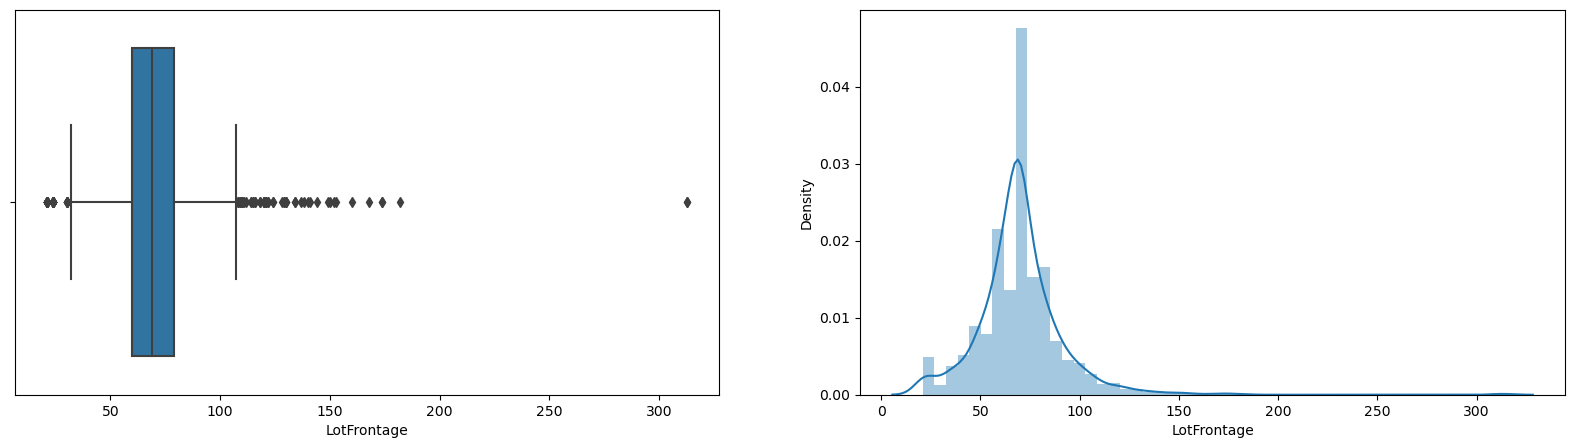

In [164]:
boxHistPlot(train["LotFrontage"])

In [165]:
ub_LotFrontage = train["LotFrontage"].mean() + 3*train["LotFrontage"].std()
lb_LotFrontage = train["LotFrontage"].mean() - 3*train["LotFrontage"].std()

train.loc[train["LotFrontage"] > ub_LotFrontage, "LotFrontage"] = ub_LotFrontage
train.loc[train["LotFrontage"] < lb_LotFrontage, "LotFrontage"] = lb_LotFrontage

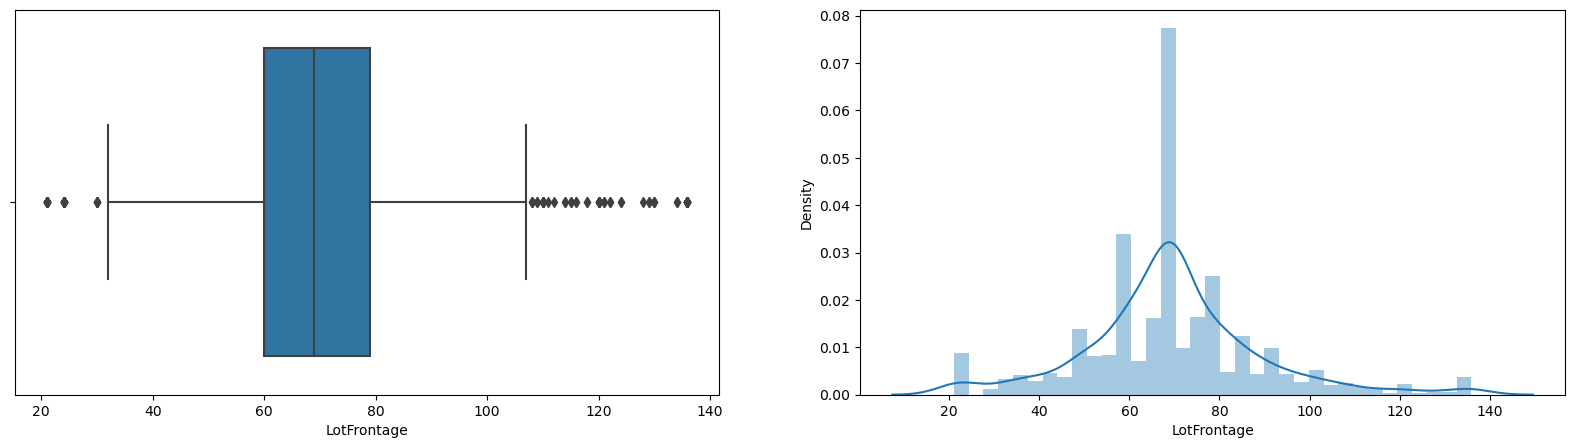

In [166]:
boxHistPlot(train["LotFrontage"])

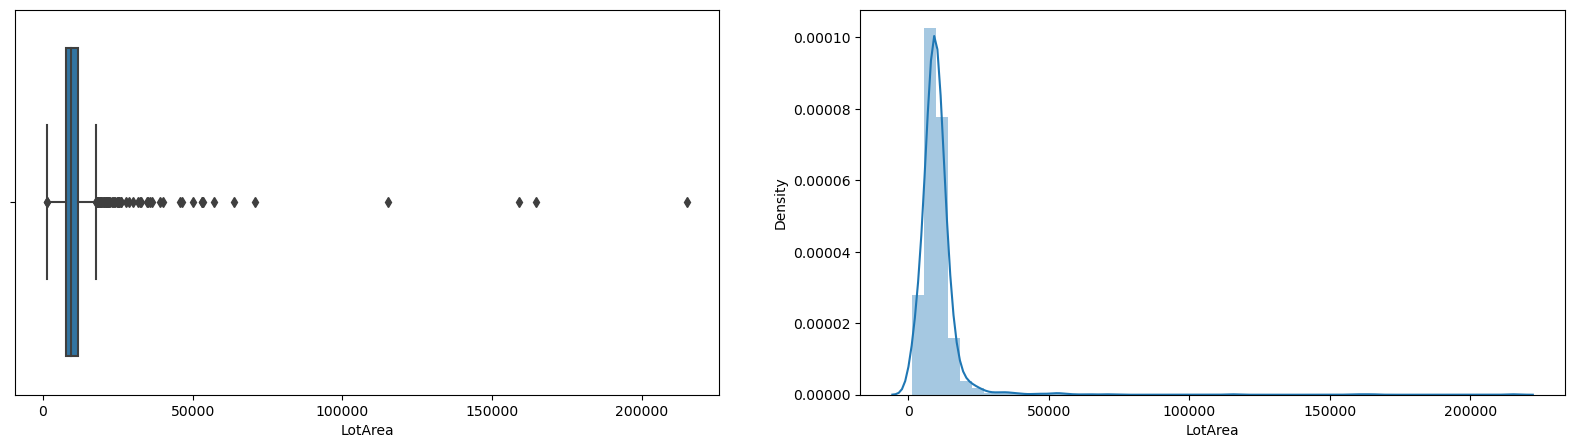

In [167]:
boxHistPlot(train["LotArea"])

In [168]:
IQR_LotArea = train["LotArea"].quantile(0.75)- train["LotArea"].quantile(0.25)

ub_LotArea = train["LotArea"].quantile(0.75) + (1.5*IQR_LotArea)
lb_LotArea = train["LotArea"].quantile(0.25) - (1.5*IQR_LotArea)

train.loc[train["LotArea"] > ub_LotArea, "LotArea"] = ub_LotArea
train.loc[train["LotArea"] < lb_LotArea, "LotArea"] = lb_LotArea

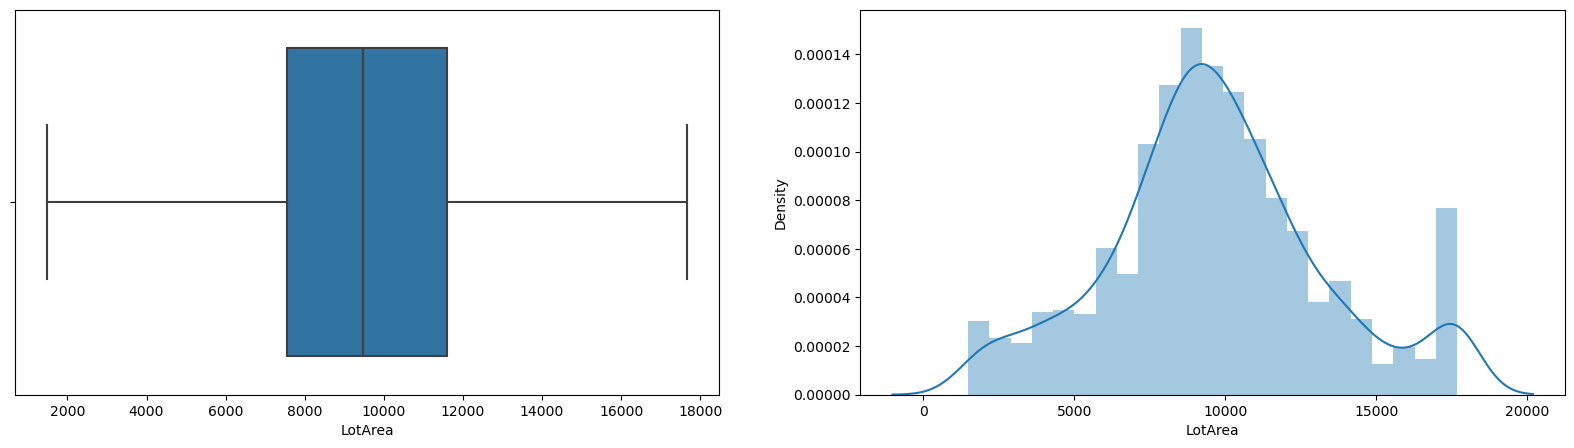

In [169]:
boxHistPlot(train["LotArea"])

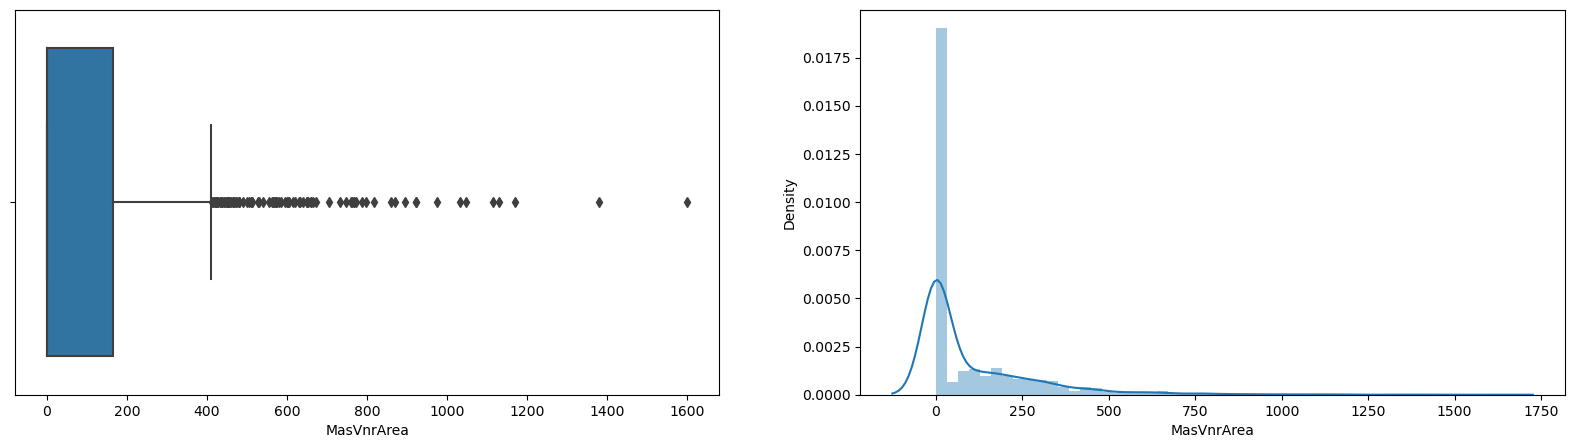

In [170]:
boxHistPlot(train["MasVnrArea"])

In [171]:
IQR_MasVnrArea = train["MasVnrArea"].quantile(0.75)- train["MasVnrArea"].quantile(0.25)

ub_MasVnrArea = train["MasVnrArea"].quantile(0.75) + (1.5*IQR_MasVnrArea)
lb_MasVnrArea = train["MasVnrArea"].quantile(0.25) - (1.5*IQR_MasVnrArea)

train.loc[train["MasVnrArea"] > ub_MasVnrArea, "MasVnrArea"] = ub_MasVnrArea
train.loc[train["MasVnrArea"] < lb_MasVnrArea, "MasVnrArea"] = lb_MasVnrArea

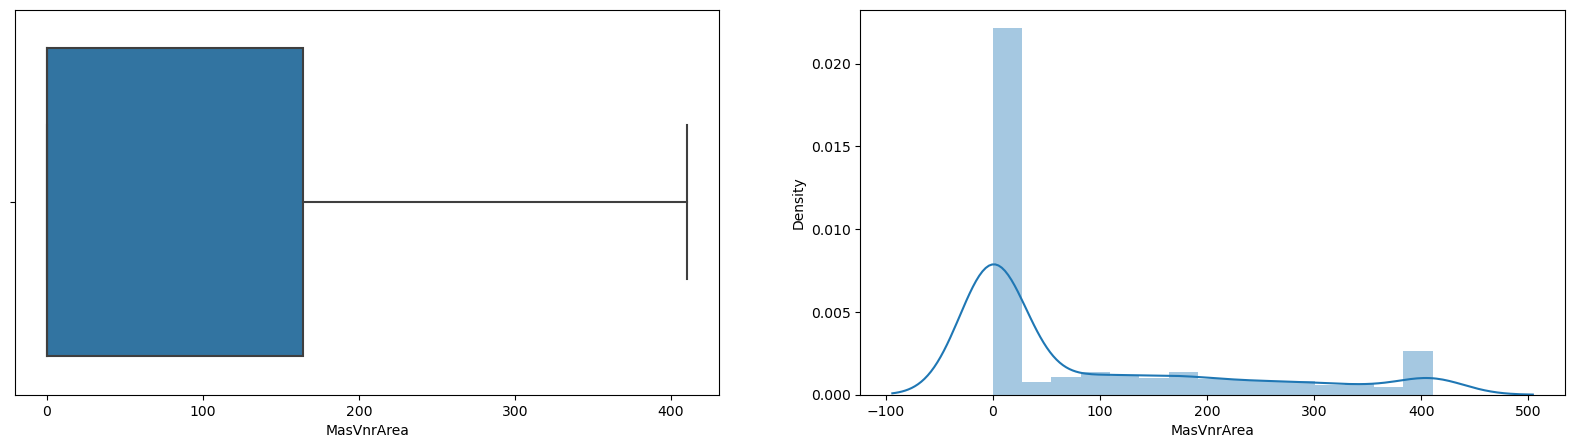

In [172]:
boxHistPlot(train["MasVnrArea"])

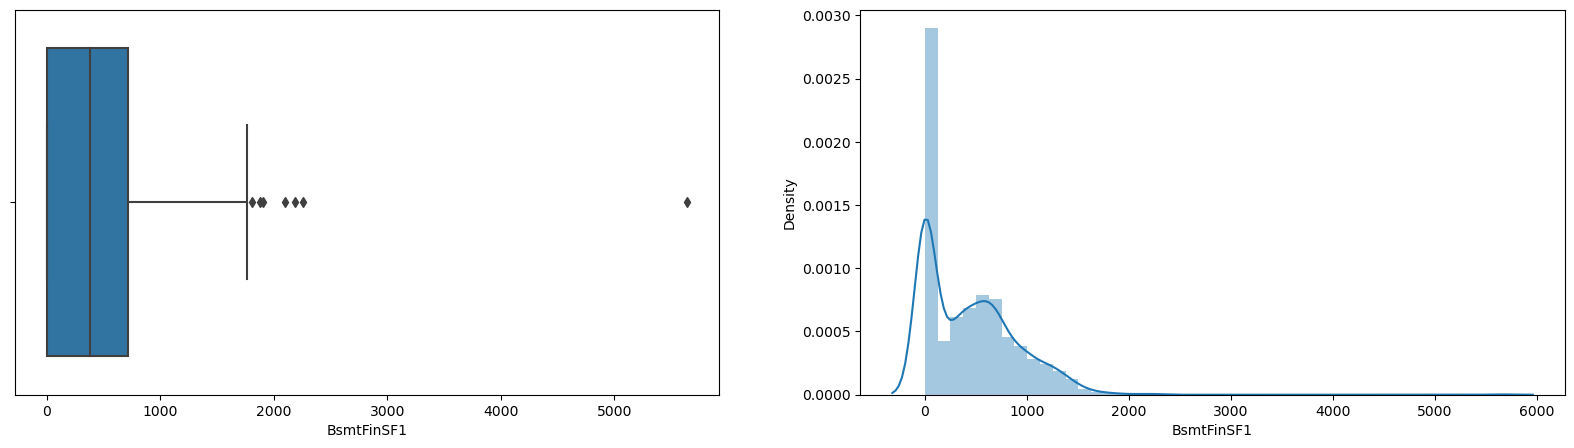

In [173]:
boxHistPlot(train["BsmtFinSF1"])

In [174]:
#train["BsmtFinSF1"].describe()

In [175]:
#train["BsmtFinSF1"].skew()

In [176]:
IQR_BsmtFinSF1 = train["BsmtFinSF1"].quantile(0.75)- train["BsmtFinSF1"].quantile(0.25)

ub_BsmtFinSF1 = train["BsmtFinSF1"].quantile(0.75) + (1.5*IQR_BsmtFinSF1)
lb_BsmtFinSF1 = train["BsmtFinSF1"].quantile(0.25) - (1.5*IQR_BsmtFinSF1)

train.loc[train["BsmtFinSF1"] > ub_BsmtFinSF1, "BsmtFinSF1"] = ub_BsmtFinSF1
#train.loc[train["BsmtFinSF1"] < lb_BsmtFinSF1, "BsmtFinSF1"] = lb_BsmtFinSF1

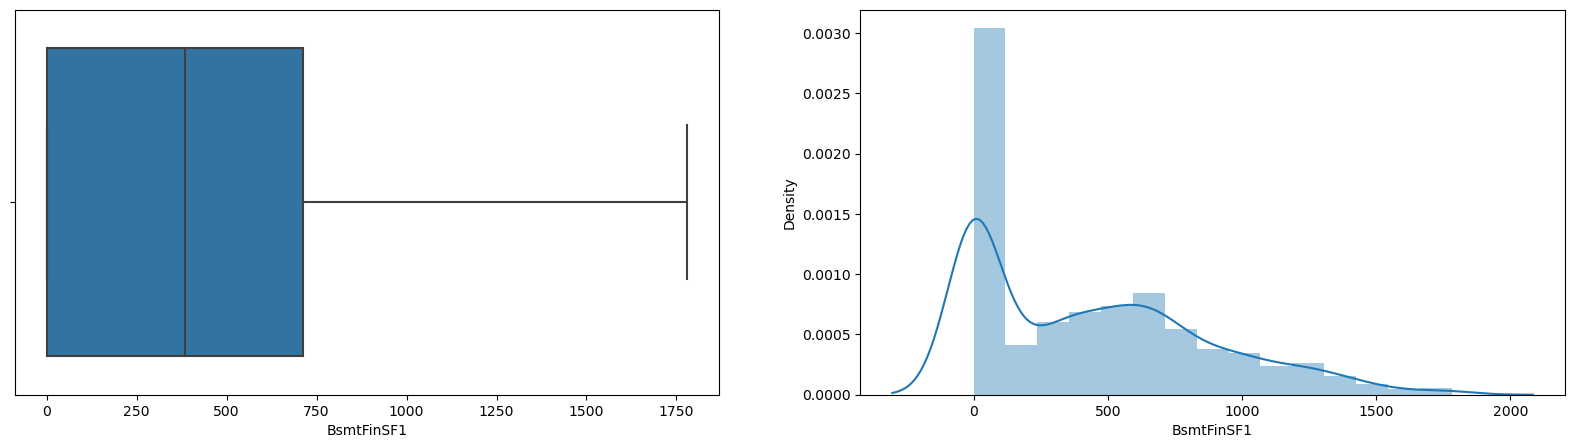

In [177]:
boxHistPlot(train["BsmtFinSF1"])

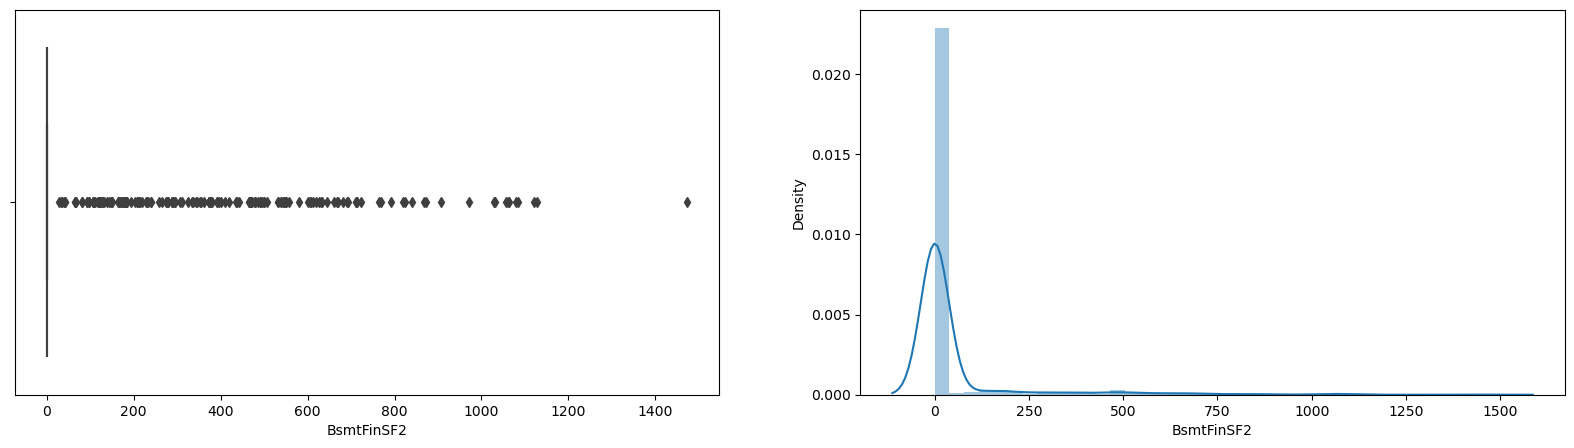

In [178]:
boxHistPlot(train["BsmtFinSF2"])

In [179]:
train["BsmtFinSF2"].skew()

4.255261108933303

In [180]:
train["BsmtFinSF2"].describe()

count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64

In [181]:
IQR_BsmtFinSF2 = train["BsmtFinSF2"].quantile(0.75)- train["BsmtFinSF2"].quantile(0.25)

ub_BsmtFinSF2 = train["BsmtFinSF2"].quantile(0.75) + (1.5*IQR_BsmtFinSF2)
lb_BsmtFinSF2 = train["BsmtFinSF2"].quantile(0.25) - (1.5*IQR_BsmtFinSF2)

train.loc[train["BsmtFinSF2"] > ub_BsmtFinSF2, "BsmtFinSF2"] = ub_BsmtFinSF2
#train.loc[train["BsmtFinSF1"] < lb_BsmtFinSF1, "BsmtFinSF1"] = lb_BsmtFinSF1

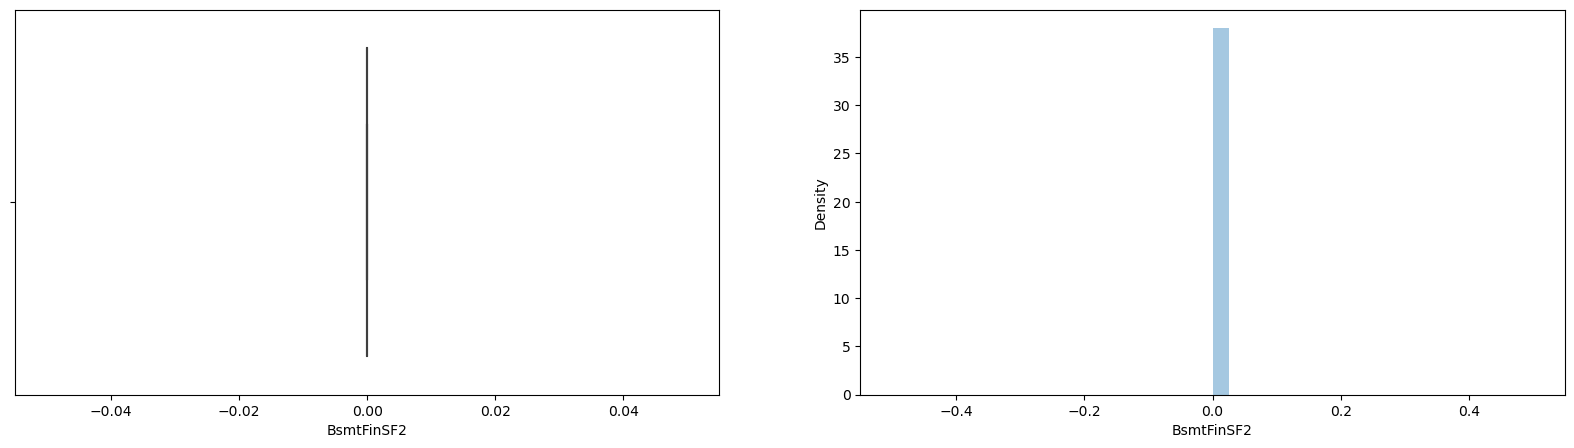

In [182]:
boxHistPlot(train["BsmtFinSF2"])

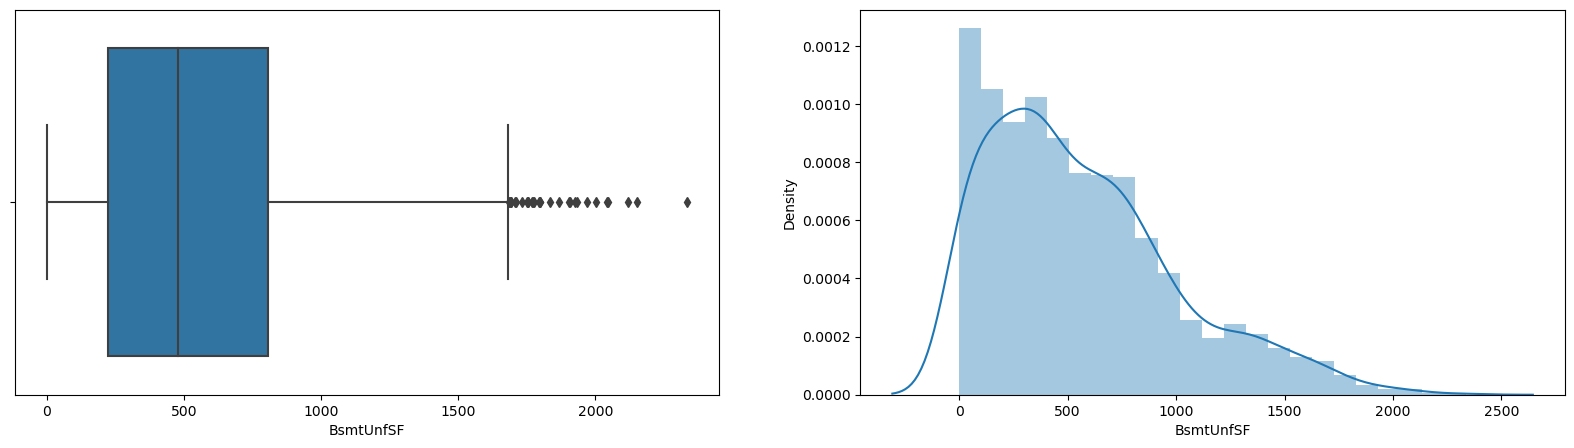

In [183]:
boxHistPlot(train["BsmtUnfSF"])

In [184]:
IQR_BsmtUnfSF = train["BsmtUnfSF"].quantile(0.75)- train["BsmtUnfSF"].quantile(0.25)

ub_BsmtUnfSF = train["BsmtUnfSF"].quantile(0.75) + (1.5*IQR_BsmtUnfSF)
lb_BsmtUnfSF = train["BsmtUnfSF"].quantile(0.25) - (1.5*IQR_BsmtUnfSF)

train.loc[train["BsmtUnfSF"] > ub_BsmtUnfSF, "BsmtUnfSF"] = ub_BsmtUnfSF
#train.loc[train["BsmtFinSF1"] < lb_BsmtFinSF1, "BsmtFinSF1"] = lb_BsmtFinSF1

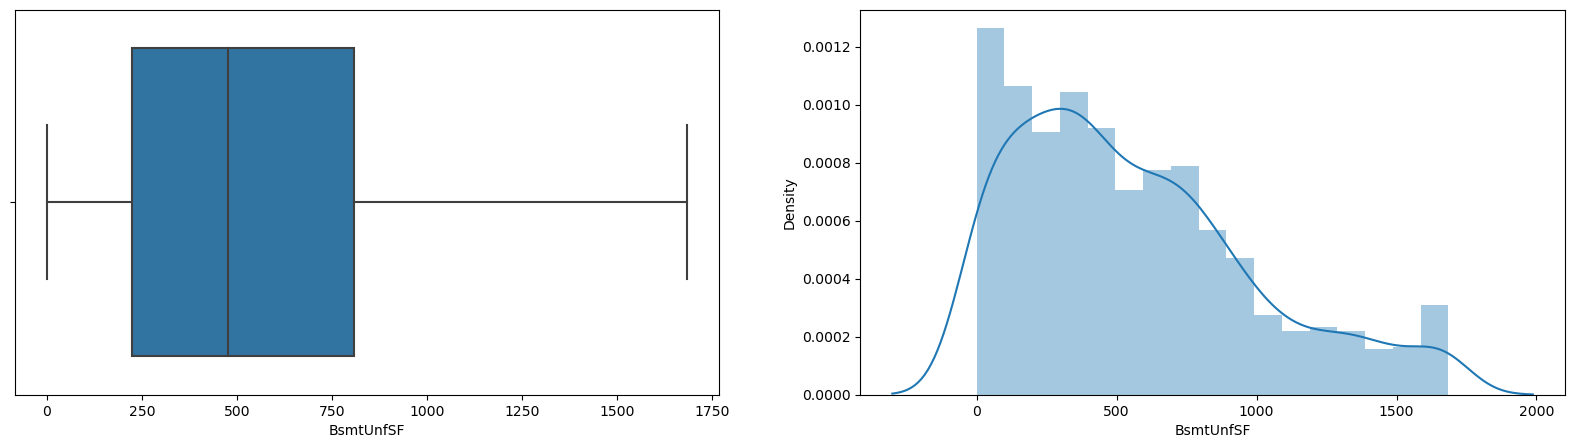

In [185]:
boxHistPlot(train["BsmtUnfSF"])

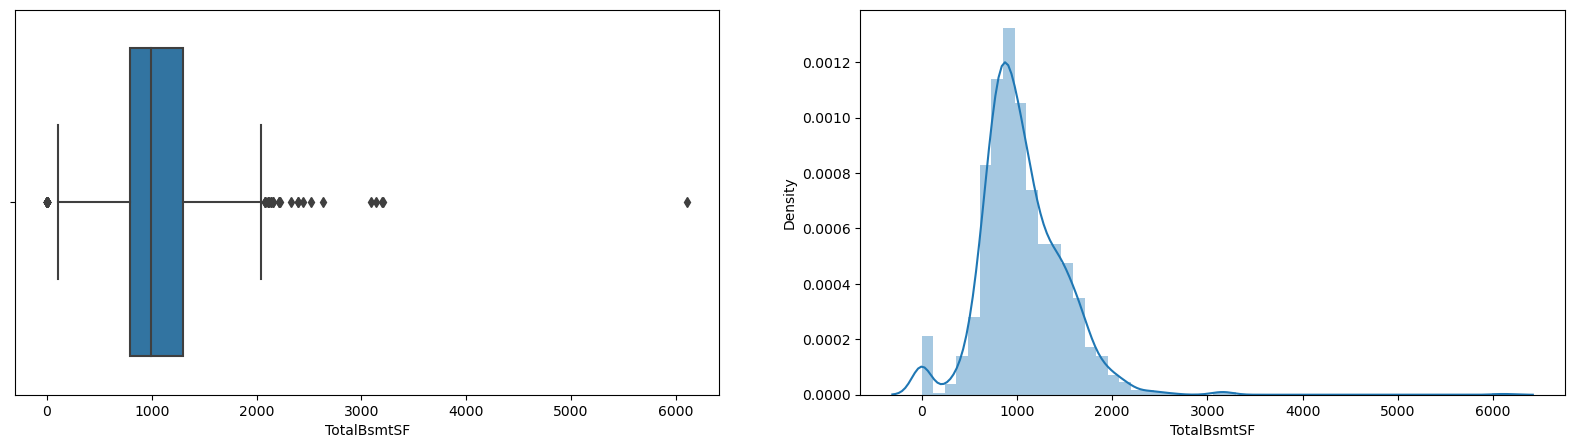

In [186]:
boxHistPlot(train["TotalBsmtSF"])

In [187]:
ub_TotalBsmtSF = train["TotalBsmtSF"].mean() + 3*train["TotalBsmtSF"].std()
lb_TotalBsmtSF  = train["TotalBsmtSF"].mean() - 3*train["TotalBsmtSF"].std()

train.loc[train["TotalBsmtSF"] > ub_TotalBsmtSF , "TotalBsmtSF"] = ub_TotalBsmtSF
train.loc[train["TotalBsmtSF"] < lb_TotalBsmtSF, "TotalBsmtSF"]= lb_TotalBsmtSF

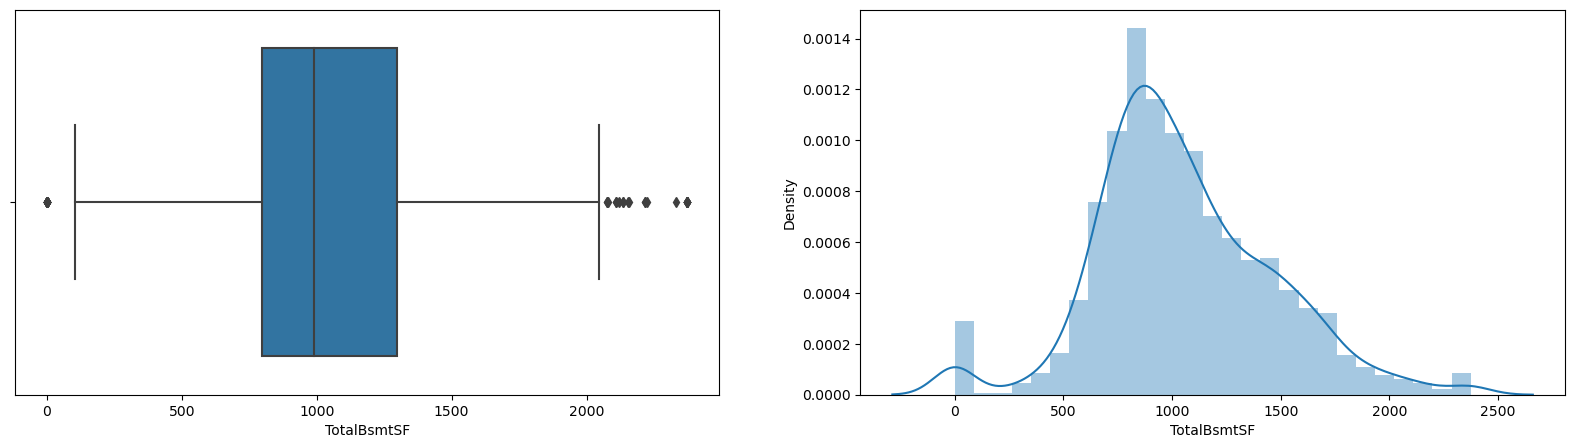

In [188]:
boxHistPlot(train["TotalBsmtSF"])

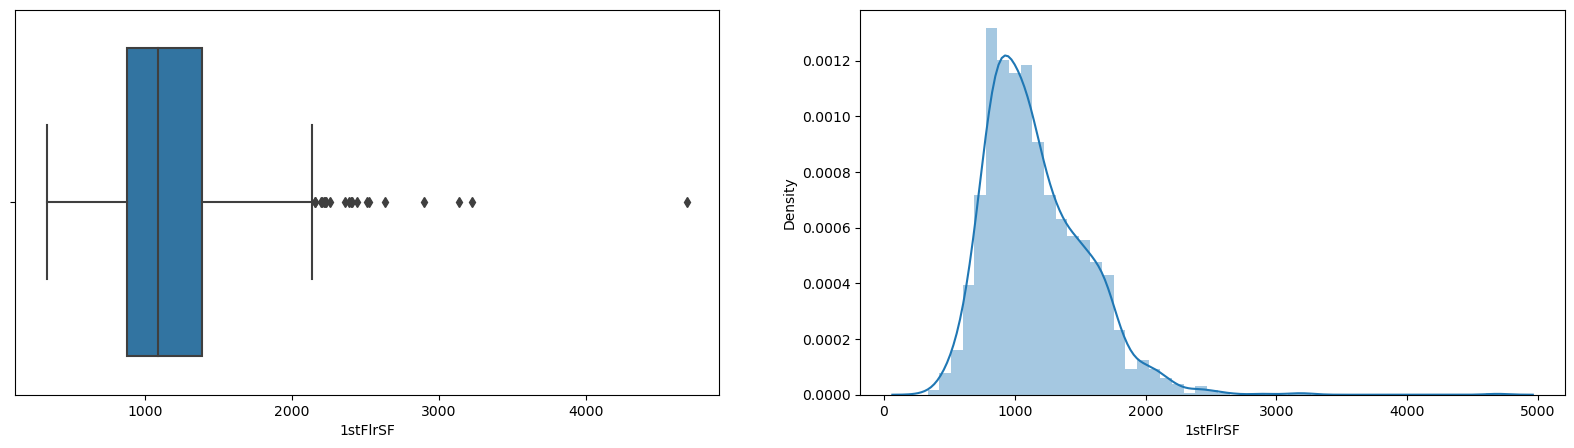

In [189]:
boxHistPlot(train["1stFlrSF"])

In [190]:
IQR_1stFlrSF = train["1stFlrSF"].quantile(0.75)- train["1stFlrSF"].quantile(0.25)

ub_1stFlrSF = train["1stFlrSF"].quantile(0.75) + (1.5*IQR_1stFlrSF)
lb_1stFlrSF = train["1stFlrSF"].quantile(0.25) - (1.5*IQR_1stFlrSF)

train.loc[train["1stFlrSF"] > ub_1stFlrSF, "1stFlrSF"] = ub_1stFlrSF

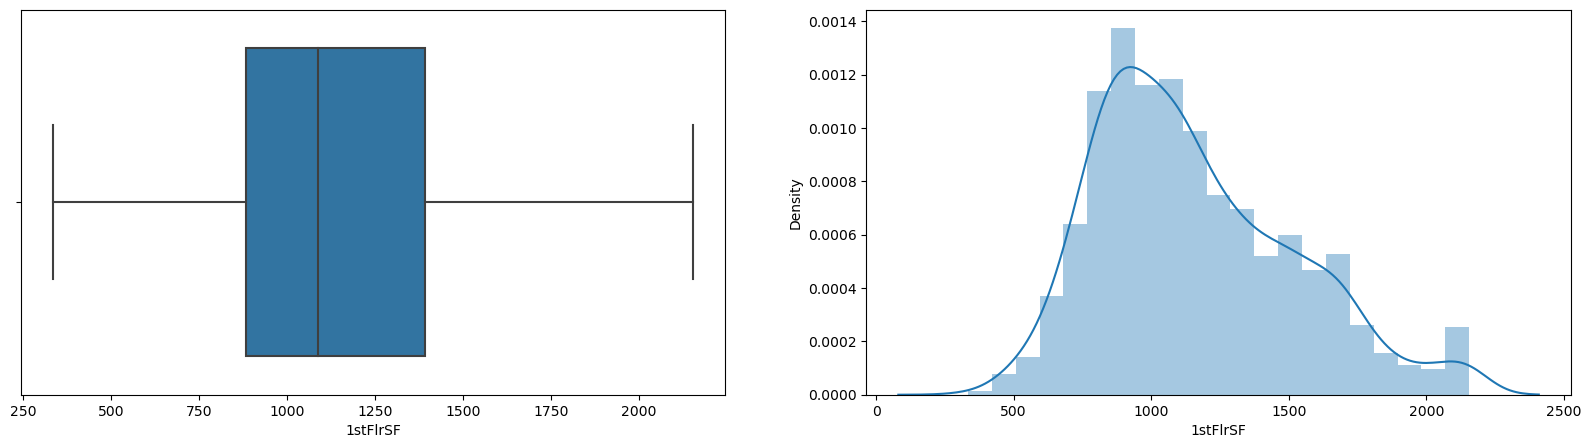

In [191]:
boxHistPlot(train["1stFlrSF"])

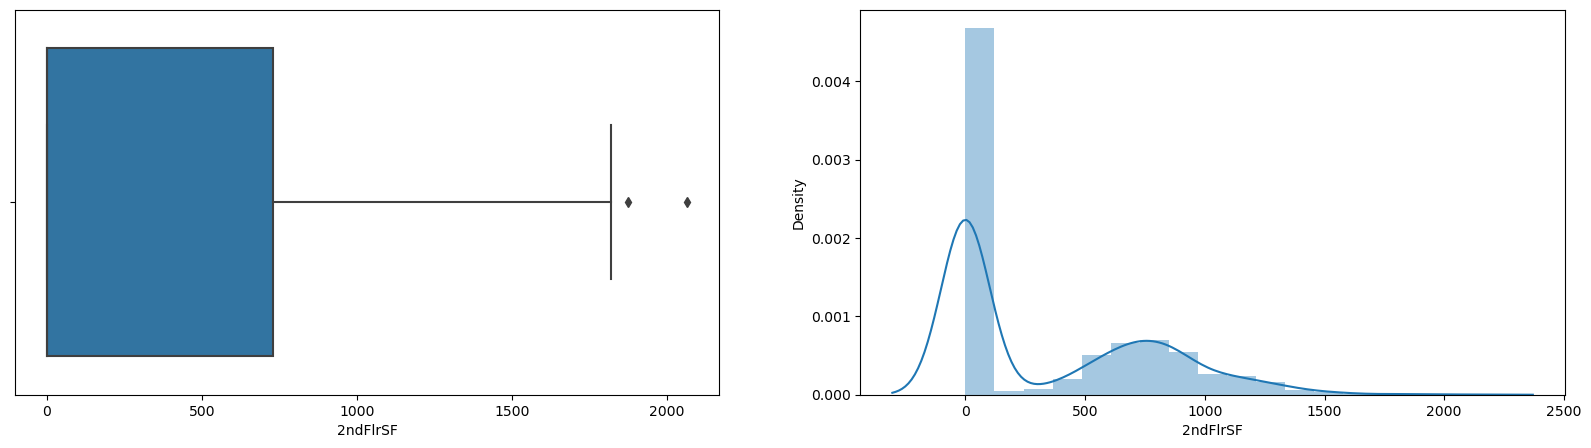

In [192]:
boxHistPlot(train["2ndFlrSF"])

In [193]:
IQR_2ndFlrSF = train["2ndFlrSF"].quantile(0.75)- train["2ndFlrSF"].quantile(0.25)

ub_2ndFlrSF = train["2ndFlrSF"].quantile(0.75) + (1.5*IQR_2ndFlrSF)
lb_2ndFlrSF = train["2ndFlrSF"].quantile(0.25) - (1.5*IQR_2ndFlrSF)

train.loc[train["2ndFlrSF"] > ub_2ndFlrSF, "2ndFlrSF"] = ub_2ndFlrSF

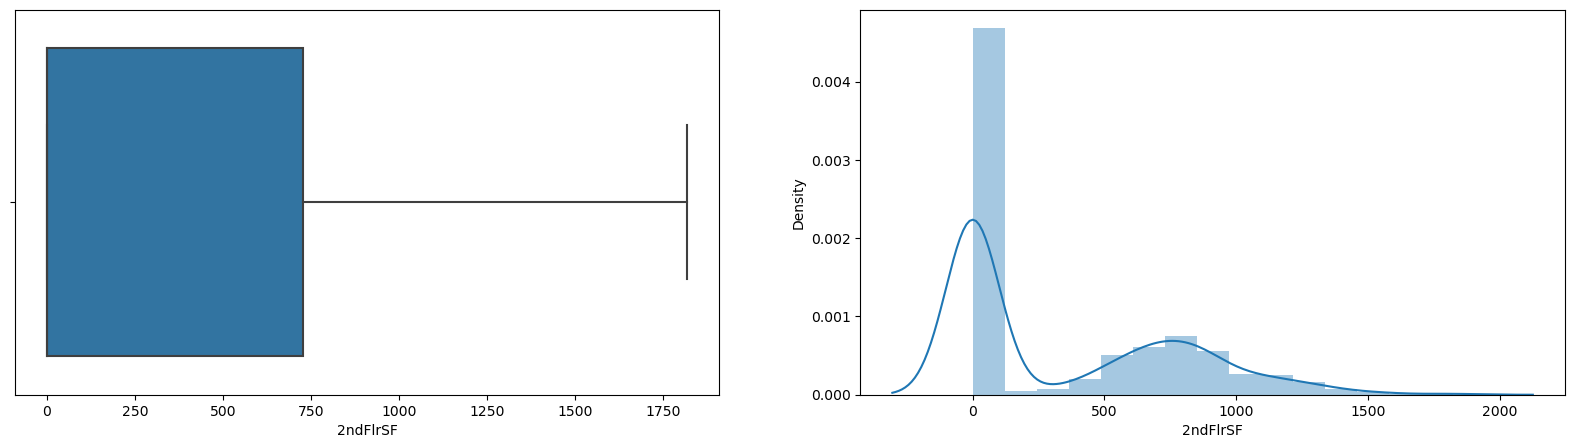

In [194]:
boxHistPlot(train["2ndFlrSF"])

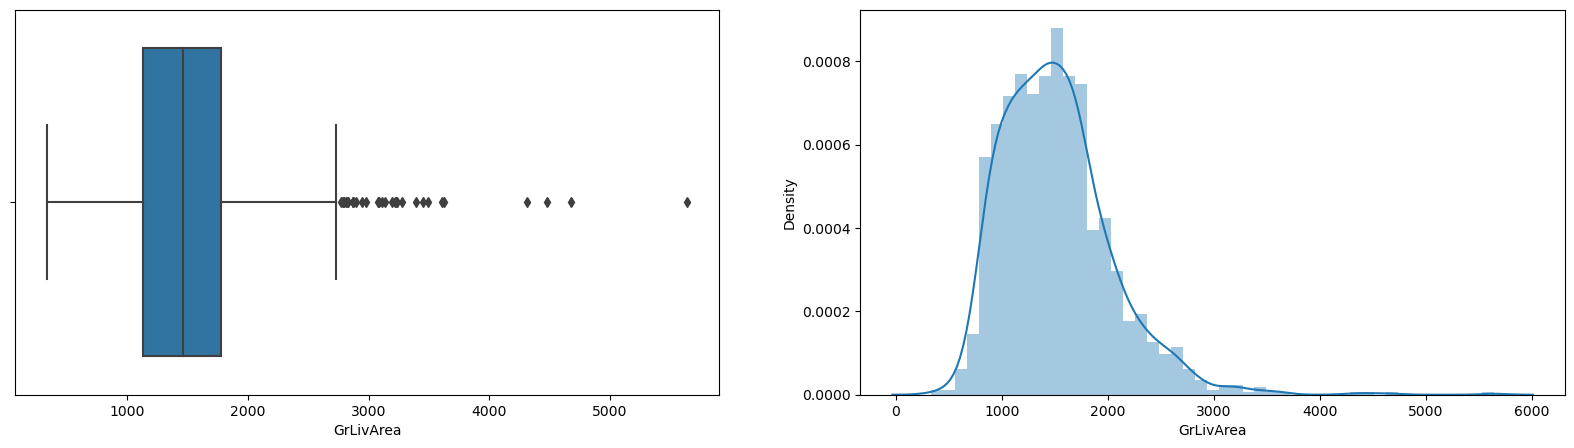

In [195]:
boxHistPlot(train["GrLivArea"])

In [196]:
IQR_GrLivArea = train["GrLivArea"].quantile(0.75)- train["GrLivArea"].quantile(0.25)

ub_GrLivArea = train["GrLivArea"].quantile(0.75) + (1.5*IQR_GrLivArea)
lb_GrLivArea = train["GrLivArea"].quantile(0.25) - (1.5*IQR_GrLivArea)

train.loc[train["GrLivArea"] > ub_GrLivArea, "GrLivArea"] = ub_GrLivArea

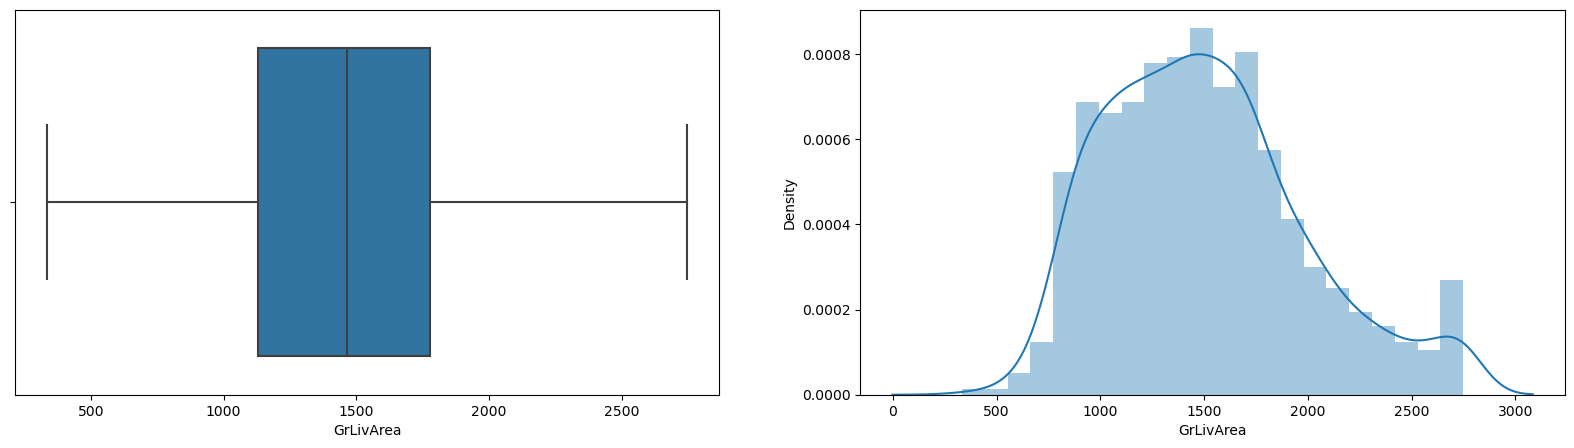

In [197]:
boxHistPlot(train["GrLivArea"])

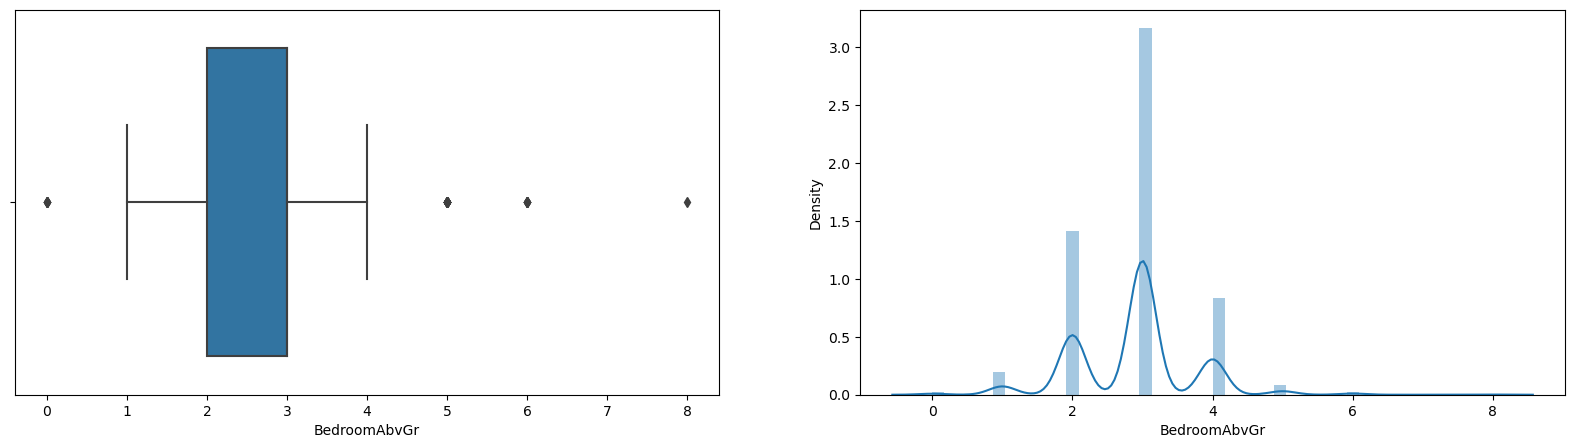

In [198]:
boxHistPlot(train["BedroomAbvGr"])

In [199]:
ub_BedroomAbvGr = train["BedroomAbvGr"].mean() + 3*train["BedroomAbvGr"].std()
lb_BedroomAbvGr  = train["BedroomAbvGr"].mean() - 3*train["BedroomAbvGr"].std()

train.loc[train["BedroomAbvGr"] > ub_BedroomAbvGr, "BedroomAbvGr"] = ub_BedroomAbvGr
train.loc[train["BedroomAbvGr"] < lb_BedroomAbvGr, "BedroomAbvGr"]= lb_BedroomAbvGr

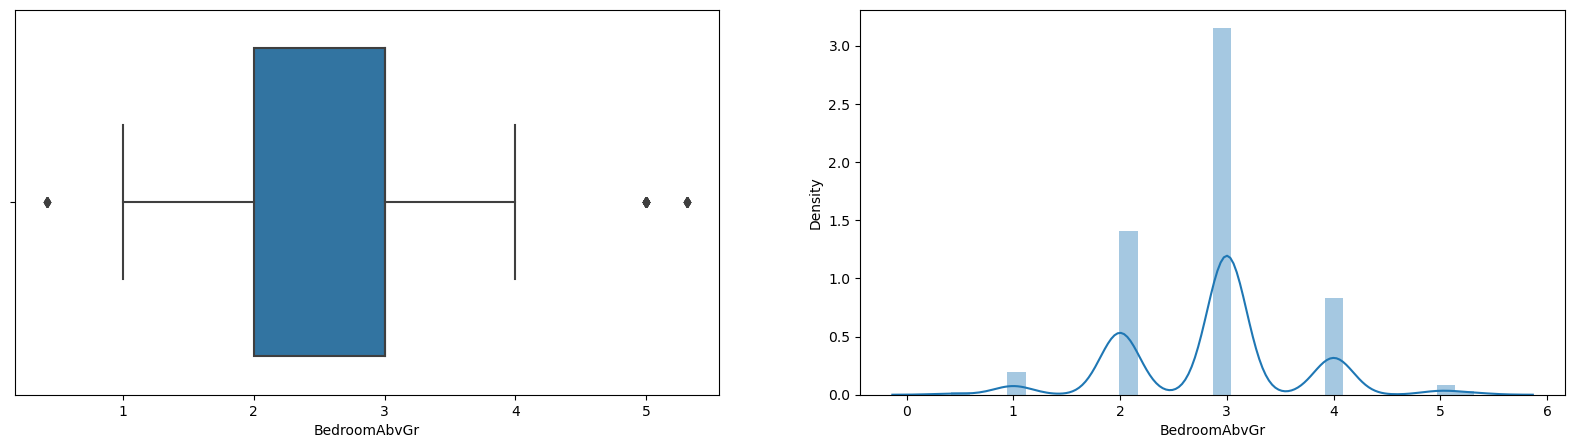

In [200]:
boxHistPlot(train["BedroomAbvGr"])

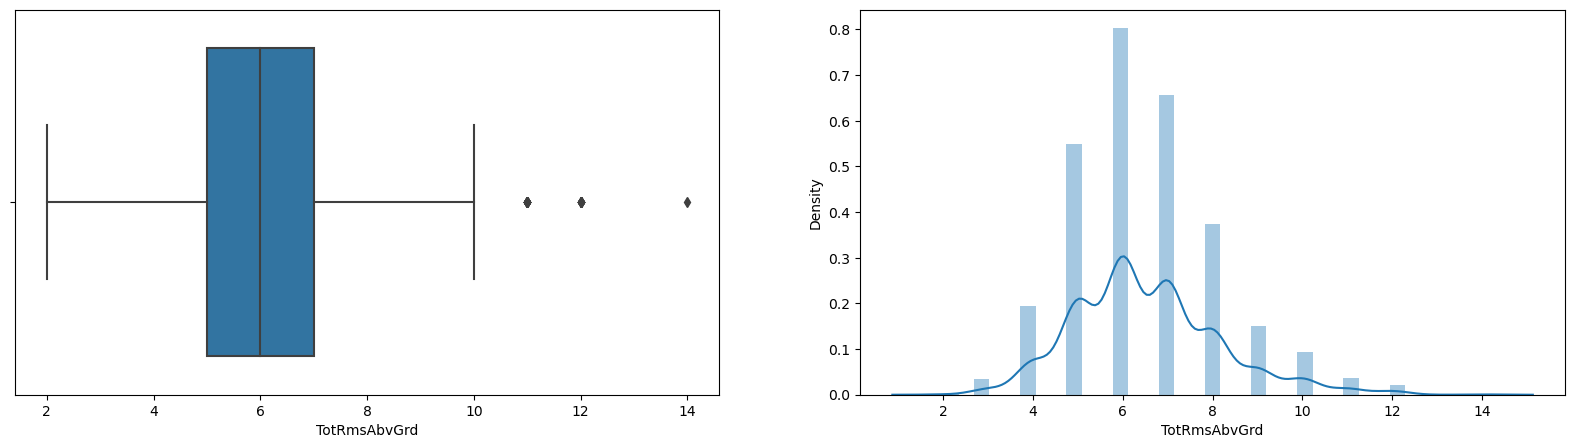

In [201]:
boxHistPlot(train["TotRmsAbvGrd"])

In [202]:
ub_TotRmsAbvGrd = train["TotRmsAbvGrd"].mean() + 3*train["TotRmsAbvGrd"].std()
lb_TotRmsAbvGrd  = train["TotRmsAbvGrd"].mean() - 3*train["TotRmsAbvGrd"].std()

train.loc[train["TotRmsAbvGrd"] > ub_TotRmsAbvGrd, "TotRmsAbvGrd"] = ub_TotRmsAbvGrd
train.loc[train["TotRmsAbvGrd"] < lb_TotRmsAbvGrd, "TotRmsAbvGrd"]= lb_TotRmsAbvGrd

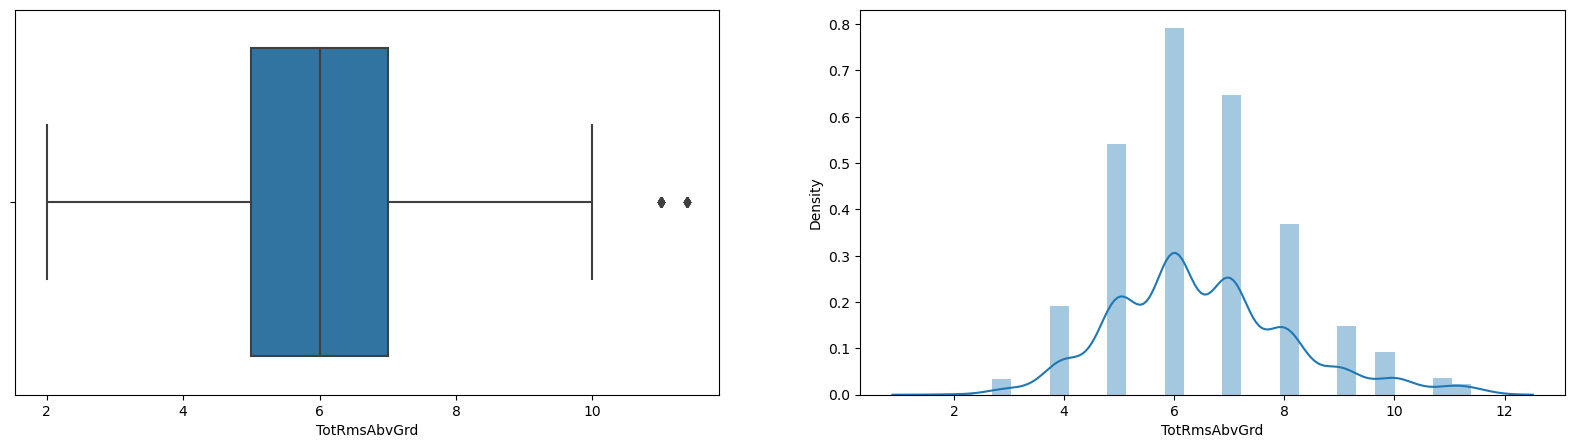

In [203]:
boxHistPlot(train["TotRmsAbvGrd"])

In [204]:
#boxHistPlot(train["GarageYrBlt"])

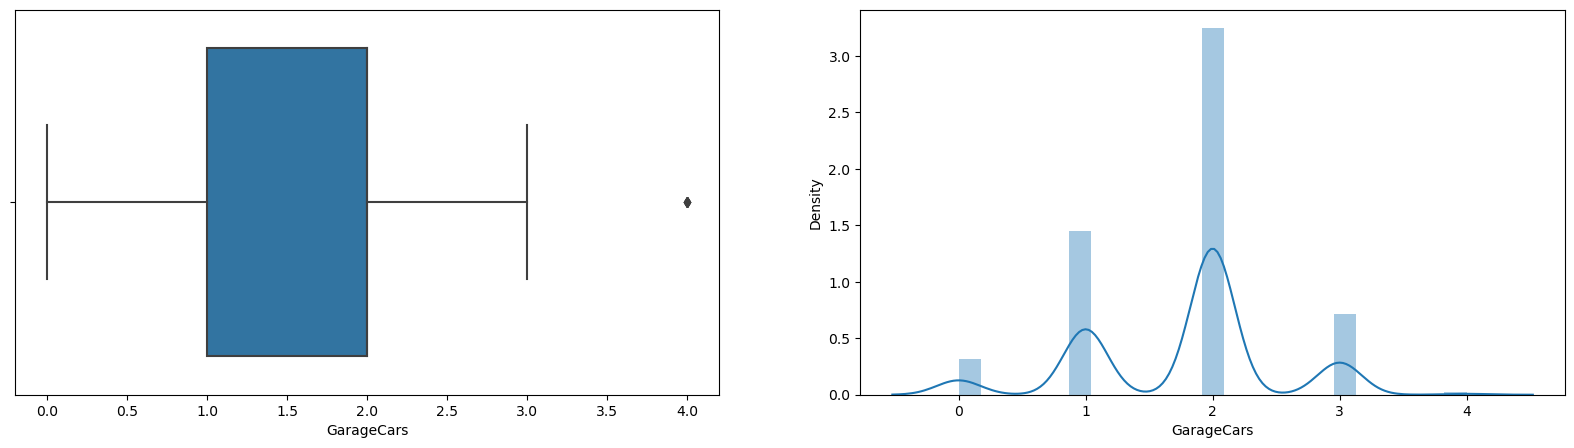

In [205]:
boxHistPlot(train["GarageCars"])

In [206]:
ub_GarageCars = train["GarageCars"].mean() + 3*train["GarageCars"].std()
lb_GarageCars = train["GarageCars"].mean() - 3*train["GarageCars"].std()

train.loc[train["GarageCars"] > ub_GarageCars, "GarageCars"] = ub_GarageCars
train.loc[train["GarageCars"] < lb_GarageCars, "GarageCars"]= lb_GarageCars

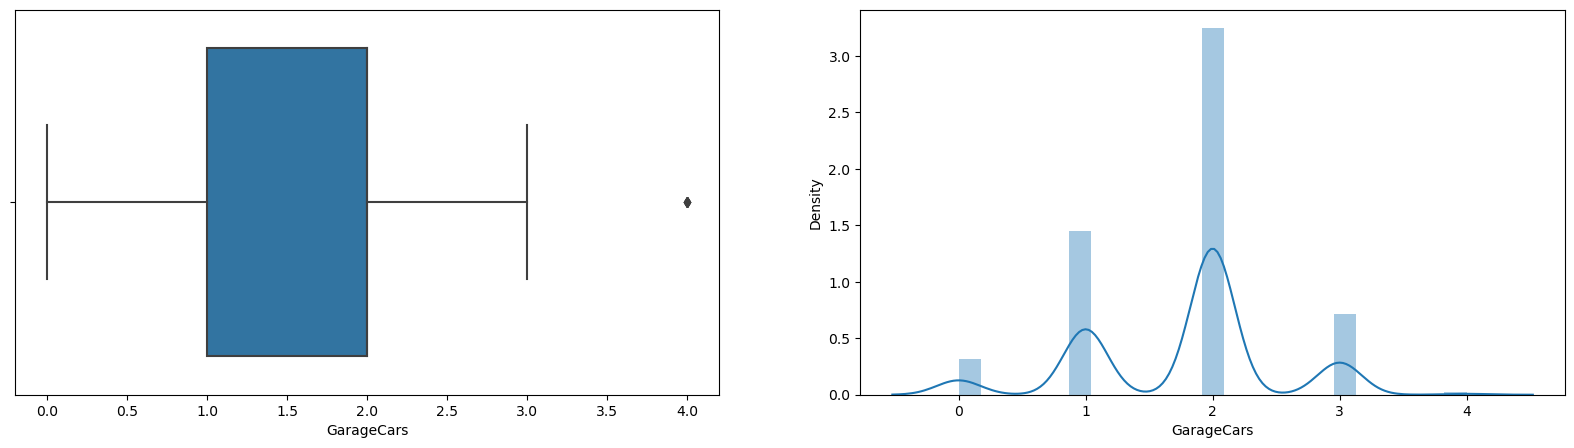

In [207]:
boxHistPlot(train["GarageCars"])

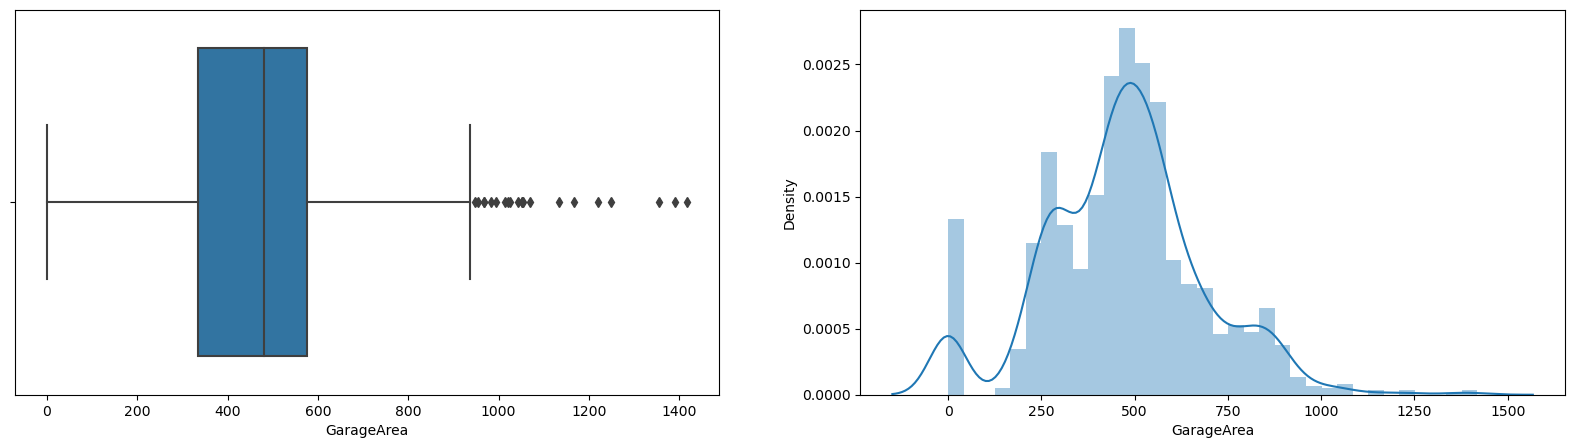

In [208]:
boxHistPlot(train["GarageArea"])

In [209]:
ub_GarageArea = train["GarageArea"].mean() + 3*train["GarageArea"].std()
lb_GarageArea = train["GarageArea"].mean() - 3*train["GarageArea"].std()

train.loc[train["GarageArea"] > ub_GarageArea, "GarageArea"] = ub_GarageArea
train.loc[train["GarageArea"] < lb_GarageArea, "GarageArea"] = lb_GarageArea

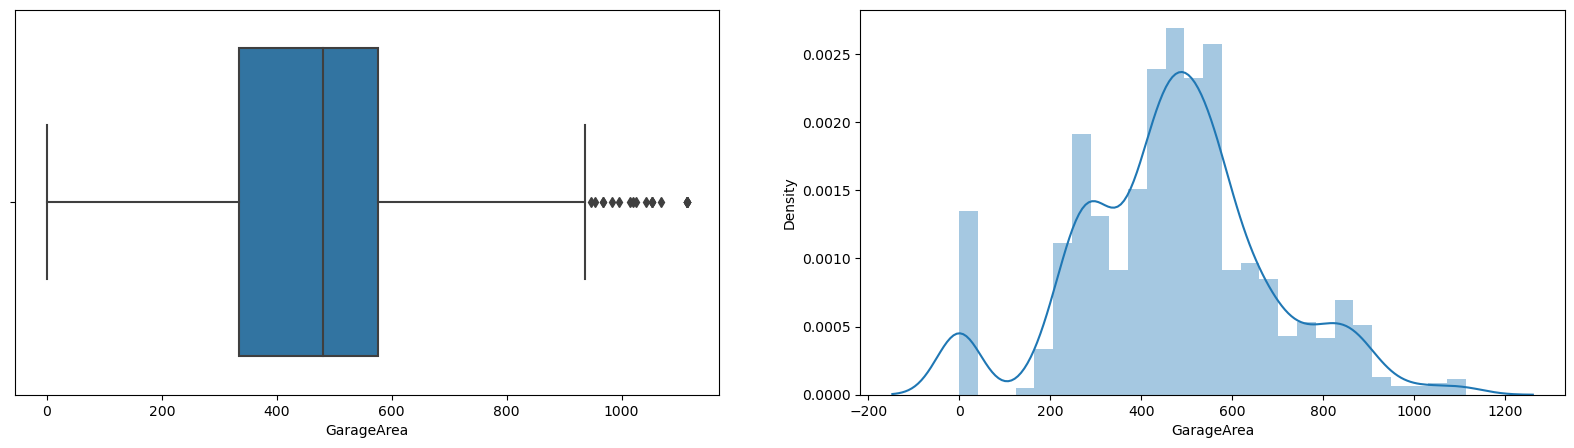

In [210]:
boxHistPlot(train["GarageArea"])

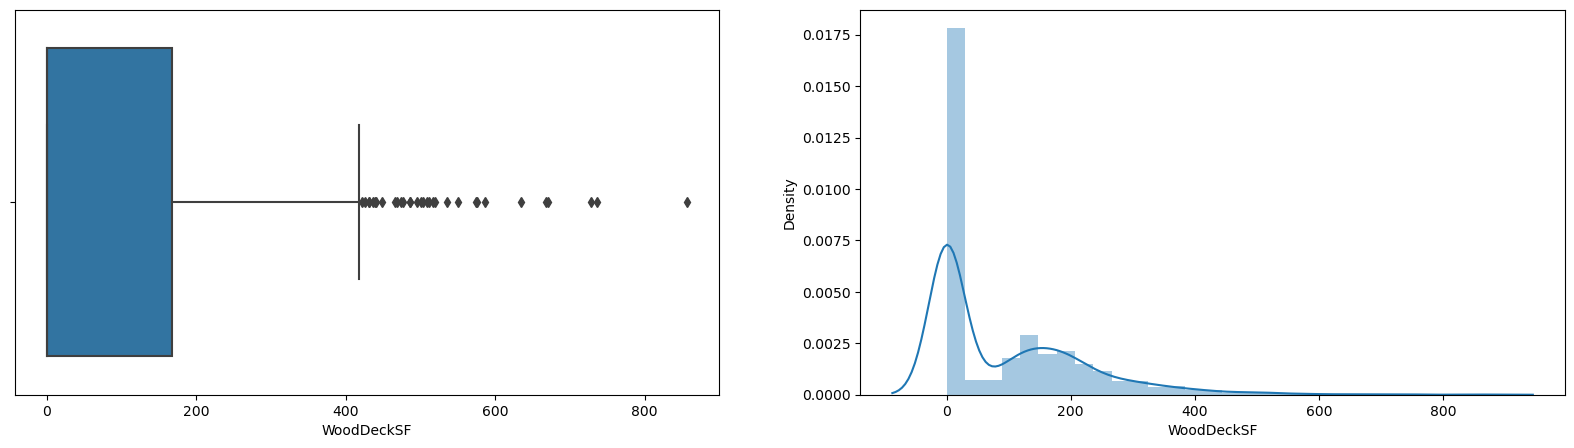

In [211]:
boxHistPlot(train["WoodDeckSF"])

In [212]:
IQR_WoodDeckSF = train["WoodDeckSF"].quantile(0.75)- train["WoodDeckSF"].quantile(0.25)

ub_WoodDeckSF = train["WoodDeckSF"].quantile(0.75) + (1.5*IQR_WoodDeckSF)
lb_WoodDeckSF = train["WoodDeckSF"].quantile(0.25) - (1.5*IQR_WoodDeckSF)

train.loc[train["WoodDeckSF"] > ub_WoodDeckSF, "WoodDeckSF"] = ub_WoodDeckSF

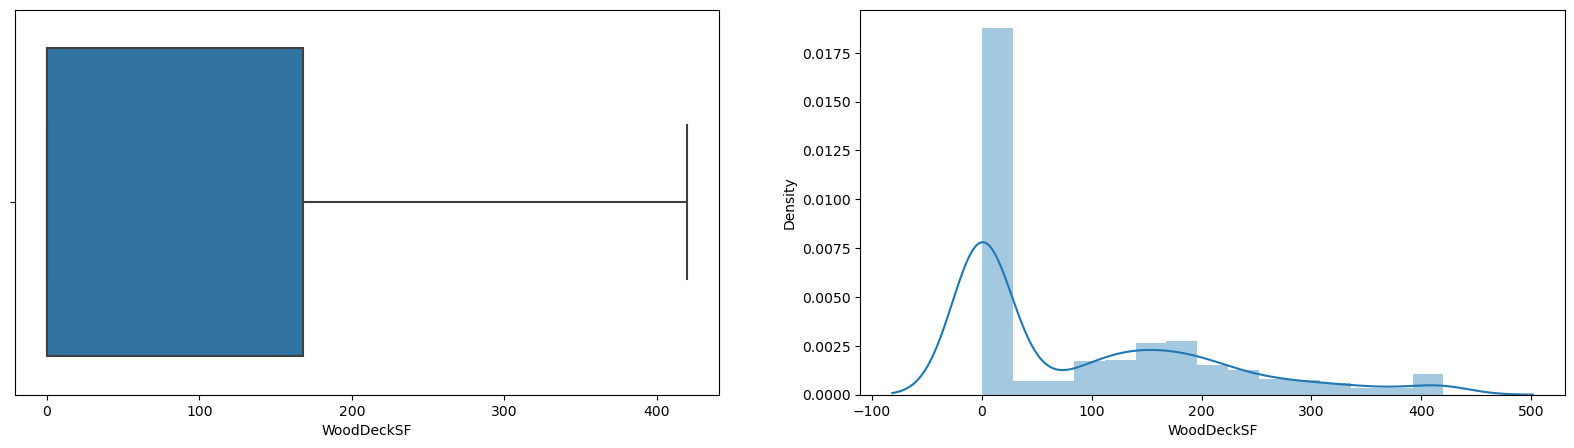

In [213]:
boxHistPlot(train["WoodDeckSF"])

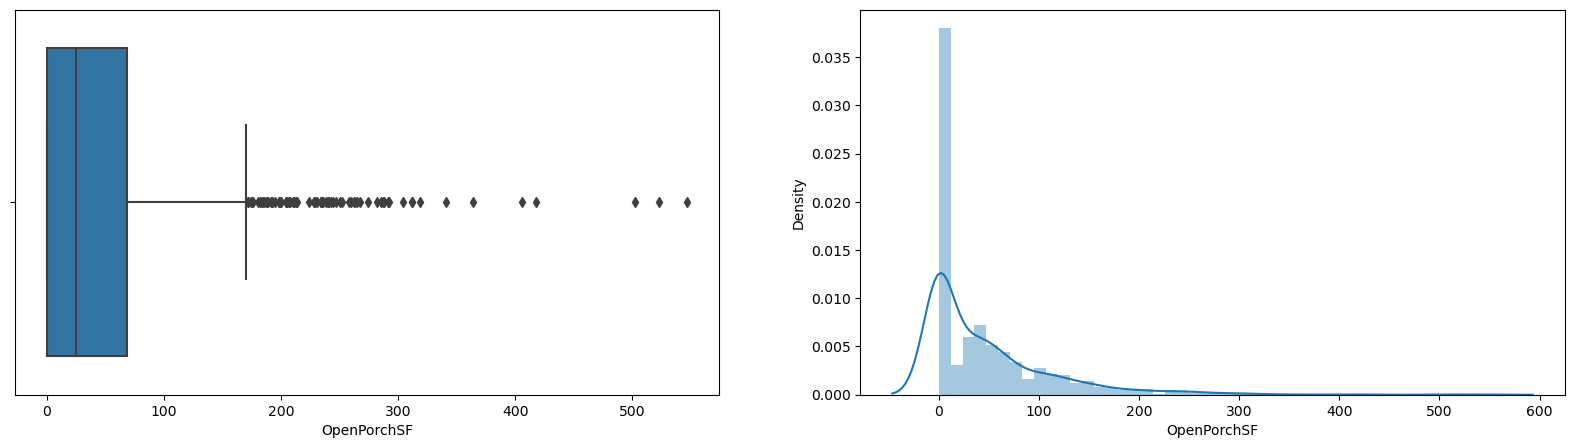

In [214]:
boxHistPlot(train["OpenPorchSF"])

In [215]:
IQR_OpenPorchSF = train["OpenPorchSF"].quantile(0.75)- train["OpenPorchSF"].quantile(0.25)

ub_OpenPorchSF = train["OpenPorchSF"].quantile(0.75) + (1.5*IQR_OpenPorchSF)
lb_OpenPorchSF = train["OpenPorchSF"].quantile(0.25) - (1.5*IQR_OpenPorchSF)

train.loc[train["OpenPorchSF"] > ub_OpenPorchSF, "OpenPorchSF"] = ub_OpenPorchSF

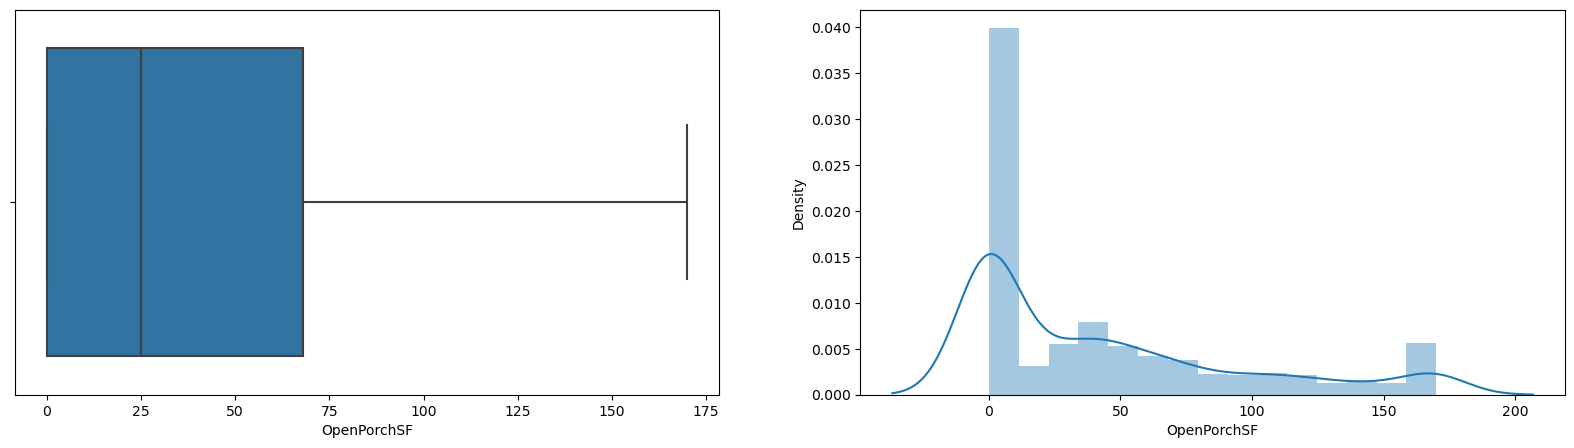

In [216]:
boxHistPlot(train["OpenPorchSF"])

### Skewness Treatment

In [217]:
#train.skew()

In [218]:
train["MasVnrArea"] = np.sqrt(train["MasVnrArea"])
print(train["MasVnrArea"].skew())

0.7713181376484932


In [219]:
train1 = train[train.LowQualFinSF > 0]

print(train1.shape)

(26, 80)


In [220]:
train1["LowQualFinSF"] = np.log(train1["LowQualFinSF"])      
print(train1.LowQualFinSF.skew())

-0.9812341244292997


In [221]:
train2 = train[train.KitchenAbvGr > 0]
print(train2.shape)

(1459, 80)


In [222]:
train2["KitchenAbvGr"] = np.log(train2["KitchenAbvGr"])    
print(train2.KitchenAbvGr.skew())

4.439453668828389


In [223]:
train["WoodDeckSF"] = np.sqrt(train["WoodDeckSF"])
print(train["WoodDeckSF"].skew())

0.41573734130842993


In [224]:
train["OpenPorchSF"] = np.sqrt(train["OpenPorchSF"])
print(train["OpenPorchSF"].skew())

0.34679419482613183


In [225]:
train["SalePrice"] = np.sqrt(train["SalePrice"])
print(train["SalePrice"].skew())

0.9431527373310963


## E) EXPLORATORY DATA ANALYSIS

To get better understanding and to explore we use data visualization

In [226]:
#df_train.describe()

Above give us the Min, Max, SD of the data which help us get to know the spread of the data

#### Target variable distribution

Let us take a look at how the house prices are distributed

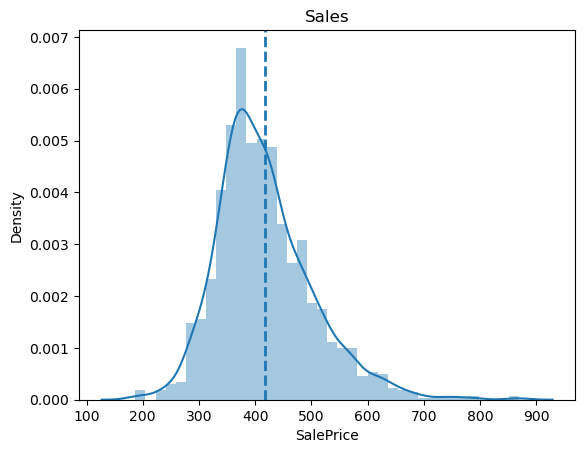

In [227]:
sns.distplot(train['SalePrice'])
plt.axvline(x = train['SalePrice'].mean(), linestyle='--', linewidth=2)
plt.title('Sales');

The above plot gives us the histogram view of the 'SalePrice' where we can observe that is is right skewed.

#### Coorelation Matrix (HeatMap Plot)

In [228]:
#plt.figure(figsize=(30,16))
#sns.heatmap(df_train.corr(),annot=True);

The above heatmap plot gives us the better understanding of the variables by correaltion.
Here we may get to know about which variables are coorelated to ecah other what is its impact on each other.

#### Boxplot

In [229]:
#train.plot(kind="box",figsize=(10,10),rot=90)

From the above plot we can observe that their are outliers prsent in the dataset. We nees to remove those since it can affect the final output. 

In [230]:
#train.hist(figsize=(25,25))
#plt.show()

#### Visualizing Distribution of Continous Numerical Features

In [231]:
con_cols = ["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF",
            "1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF",
            "EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal"]

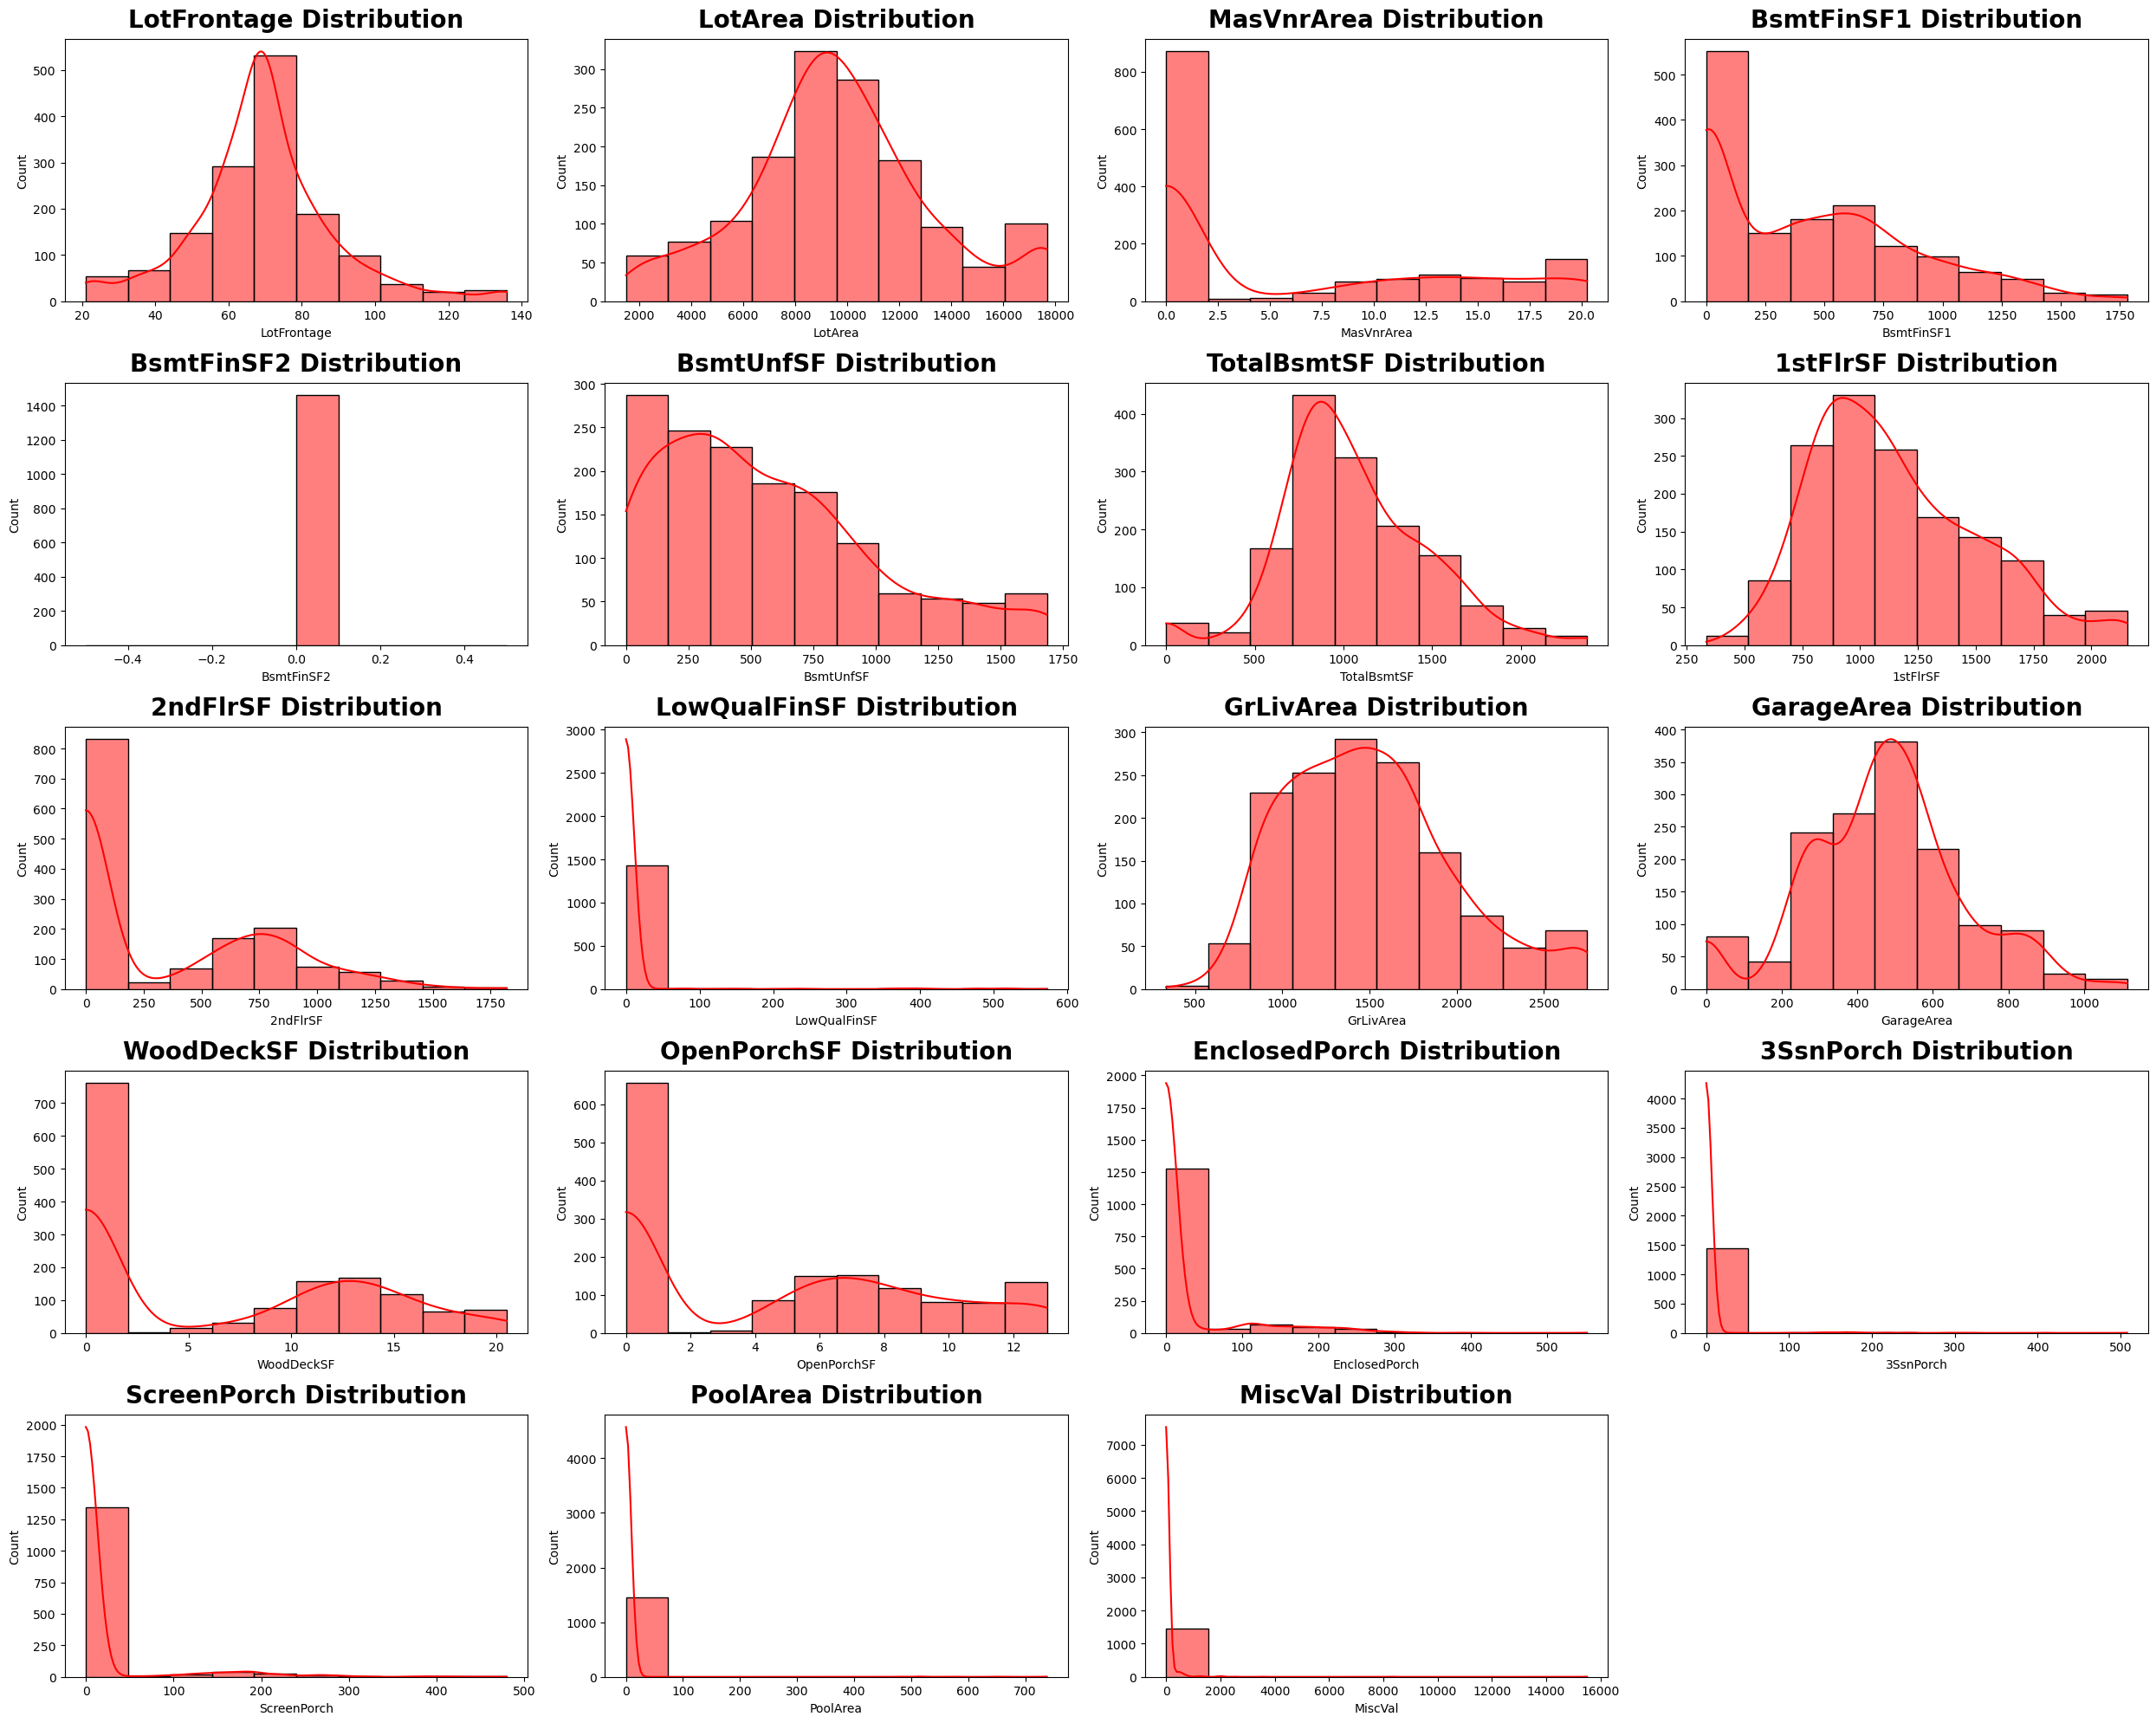

In [232]:
plt.figure(figsize=(25,20))
for index,column in enumerate(con_cols):
    plt.subplot(5,4,index+1)
    sns.histplot(train[column],bins=10,kde=True,color="red")
    plt.title(f"{column} Distribution",fontweight="black",size=20,pad=10)
    plt.tight_layout()

#### Visualizing Categorical Features w.r.t SalePrice

In [233]:
cat_cols = df_train.select_dtypes(include="object").columns.tolist()

In [234]:
def boxplot(col_list):
    plt.figure(figsize=(22,12))
    for index,column in enumerate(col_list):
        plt.subplot(2,4,index+1)
        sns.boxplot(x=column, y="SalePrice", data=df_train)
        plt.title(f"{column} vs SalePrice",fontweight="black",pad=10,size=20)
        plt.xticks(rotation=90)
        plt.tight_layout()

In [235]:
#boxplot(cat_cols[0:8])
#plt.show()

In [236]:
#boxplot(cat_cols[8:16])

In [237]:
#boxplot(cat_cols[16:24])

In [238]:
#boxplot(cat_cols[24:32])

In [239]:
#boxplot(cat_cols[32:40])

In [240]:
#boxplot(cat_cols[40:48])

### Models After EDA 

In [241]:
X2 = train.drop(columns = "SalePrice")
Y2 = train["SalePrice"]

In [242]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2)

In [243]:
X2_train.shape, Y2_train.shape, X2_test.shape, Y2_test.shape

((1168, 79), (1168,), (292, 79), (292,))

In [244]:
models1 = [(LinearRegression(),'Linear Regression'), (DecisionTreeRegressor(),'Decesion Tree'),
          (RandomForestRegressor(),'Random Forest'), (AdaBoostRegressor(),'Ada-Boost'), 
          (GradientBoostingRegressor(),'Gradient-Boost'), (SVR(),'SVR'), (KNeighborsRegressor(),'KNeighborsRegressor'), 
          (GaussianProcessRegressor(),'GaussianProcessRegressor'),(XGBRegressor(),'XG-Boost')]

results1 = []

for model, model_name in models1:
    model.fit(X2_train, Y2_train)
    Y2_pred_1 = model.predict(X2_test)
    
    r2score_1 = r2_score(Y2_test, Y2_pred_1)
    adjusted_r2_1 = 1 - (((1 - r2score_1) * (1168 - 1)) / (1168 - 79 - 1))
    mse1 = mean_squared_error(Y2_test, Y2_pred_1)
    results1.append((model_name, r2score_1, adjusted_r2_1, mse1))
    
columns = ['Model', 'R2-Score', 'Adj R2-Score', 'MSE']
model_comparison1 = pd.DataFrame(results1, columns=columns)

model_comparison1.sort_values(by= 'R2-Score', ascending = False, inplace=True)

In [245]:
model_comparison1

,Model,R2-Score,Adj R2-Score,MSE
4,Gradient-Boost,0.909979,0.903443,677.211659
0,Linear Regression,0.905558,0.898701,710.470816
2,Random Forest,0.892555,0.884753,808.295256
3,Ada-Boost,0.856960,0.846574,1076.068540
8,XG-Boost,0.856308,0.845874,1080.975486
1,Decesion Tree,0.769167,0.752406,1736.522025
6,KNeighborsRegressor,0.671606,0.647761,2470.459948
5,SVR,0.179479,0.119901,6172.661690
7,GaussianProcessRegressor,-23.756291,-25.553853,186238.082192


## F] Feature Engineering

### Lasso

In [246]:
lasso = Lasso()

In [247]:
lasso.fit(X1_train, Y1_train)

Lasso()

In [248]:
lasso_p = lasso.predict(X1_test)
lasso_p

array([222949.34300068, 391539.17883247, 226528.11678386, 181076.75175639,
       419270.40061234, 141071.24411973, 111129.91247611,  98121.759129  ,
       266610.32688005, 125259.01397594, 141801.92452026, 183937.02988294,
       100554.00814201, 120055.91160305, 266633.01630498, 254003.11043638,
       122295.02437634, 145731.43916158, 210441.12832178, 180821.64368864,
       321214.72033069, 320062.638675  , 126596.77481822, 228693.16993375,
       280580.55589427, 179058.41682098, 188489.26668243, 223118.9107345 ,
       216776.07105325, 221518.01533131, 129136.85347865, 159982.08156759,
       203756.35509642, 121435.49174506, 155067.36822635, 159954.01393428,
       116821.75075974, 210440.05140564, 206648.65093855,  70953.73148643,
       116067.29305004, 106078.02054437, 199099.34816956, 158993.65234646,
       111820.7293392 , 226190.59560609, 175514.41030054, 212726.78368735,
       256195.58318547, 163793.96347214, 240233.23228557, 207492.59489663,
       132381.45707045, 1

In [249]:
lasso.coef_

array([-1.31880648e+02, -4.14463533e+02, -2.29480993e+02,  3.69479288e-01,
        2.64397208e+04,  3.33804394e+03, -1.17732003e+03,  4.35630741e+03,
       -6.22610413e+04, -4.72942394e+02,  8.31696828e+03,  4.19894259e+02,
       -3.96396177e+02, -1.16106485e+04, -2.45648451e+03, -1.17021037e+03,
        1.17955765e+04,  4.90866494e+03,  2.04409914e+02,  7.91493304e+00,
        2.66552343e+03,  7.01559158e+03, -1.55359676e+03,  8.05667591e+02,
        3.80141258e+03,  3.88523807e+01, -8.99993817e+03,  1.44684040e+01,
        1.46194432e+03, -3.46936989e+03,  1.68305686e+03, -2.62566090e+03,
       -1.17920826e+03,  3.51266180e+00,  1.03093042e+03,  1.06983511e+01,
       -1.57959074e+00, -9.14105359e-01, -4.15441591e+03, -7.30625395e+02,
       -6.76229140e+01, -6.17299193e+02,  4.31521161e+01,  3.43951500e+01,
        2.28903367e+01,  3.91246967e+00,  8.07700776e+03,  3.85777795e+03,
        5.85872688e+03,  1.50865560e+03, -2.87298835e+03, -1.39547804e+04,
       -7.03336169e+03,  

In [250]:
lr2 = lasso.score(X1_train, Y1_train)
lr2

0.8543992402301499

In [251]:
train.shape

(1460, 80)

In [252]:
adj_l = 1-(((1-lr2)*(1168-1))/(1168-79-1))
adj_l

0.8438271262395082

In [253]:
df1 = pd.DataFrame({"Importances":list(lasso.coef_), "columns":list(X1)})
df1

,Importances,columns
0,-131.880648,MSSubClass
1,-414.463533,MSZoning
2,-229.480993,LotFrontage
3,0.369479,LotArea
4,26439.720789,Street
5,3338.043937,Alley
6,-1177.320034,LotShape
7,4356.307407,LandContour
8,-62261.041262,Utilities
9,-472.942394,LotConfig


In [254]:
df2 = train.drop(['MSSubClass','LotFrontage','LotArea','LotConfig',
       'Neighborhood','Condition1','YearBuilt','YearRemodAdd','Exterior1st','Exterior2nd','MasVnrArea','ExterCond', 
       'BsmtFinType1','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Heating','HeatingQC',
       'Electrical','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageType','GarageYrBlt','GarageFinish',
       'GarageArea','GarageQual','GarageCond','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
       'ScreenPorch','PoolArea','Fence','MiscVal','MoSold'], axis=1)

In [255]:
df2.shape

(1460, 41)

## F] MODEL AFTER FEATURE SELECTION

In [256]:
X3 = df2.drop(columns = "SalePrice")
Y3 = df2["SalePrice"]

In [257]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.2)

In [258]:
X3_train.shape, Y3_train.shape, X3_test.shape, Y3_test.shape

((1168, 40), (1168,), (292, 40), (292,))

In [259]:
models2 = [(LinearRegression(),'Linear Regression'), (DecisionTreeRegressor(),'Decesion Tree'),
          (RandomForestRegressor(),'Random Forest'), (AdaBoostRegressor(),'Ada-Boost'), 
          (GradientBoostingRegressor(),'Gradient-Boost'), (SVR(),'SVR'), (KNeighborsRegressor(),'KNeighborsRegressor'), 
          (GaussianProcessRegressor(),'GaussianProcessRegressor'),(XGBRegressor(),'XG-Boost')]

results2 = []

for model, model_name in models2:
    model.fit(X3_train, Y3_train)
    Y3_pred_2 = model.predict(X3_test)
    
    r2score_2 = r2_score(Y3_test, Y3_pred_2)
    adjusted_r2_2 = 1 - (((1 - r2score_2) * (1168 - 1)) / (1168 - 40 - 1))
    mse2 = mean_squared_error(Y3_test, Y3_pred_2)
    results2.append((model_name, r2score_2, adjusted_r2_2, mse2))
    
columns = ['Model', 'R2-Score', 'Adj R2-Score', 'MSE']
model_comparison2 = pd.DataFrame(results2, columns=columns)

model_comparison2.sort_values(by= 'R2-Score', ascending = False, inplace=True)

In [260]:
model_comparison2  #Models After Feature Selection

,Model,R2-Score,Adj R2-Score,MSE
2,Random Forest,0.816814,0.810312,1171.178056
0,Linear Regression,0.815267,0.808710,1181.069706
8,XG-Boost,0.813241,0.806612,1194.023184
4,Gradient-Boost,0.810621,0.803900,1210.771184
3,Ada-Boost,0.759545,0.751011,1537.319719
6,KNeighborsRegressor,0.752198,0.743403,1584.295447
1,Decesion Tree,0.735662,0.726280,1690.016351
5,SVR,-0.024450,-0.060810,6549.703884
7,GaussianProcessRegressor,-20.975241,-21.755196,140496.202931


In [261]:
model_comparison1   #Models After EDA

,Model,R2-Score,Adj R2-Score,MSE
4,Gradient-Boost,0.909979,0.903443,677.211659
0,Linear Regression,0.905558,0.898701,710.470816
2,Random Forest,0.892555,0.884753,808.295256
3,Ada-Boost,0.856960,0.846574,1076.068540
8,XG-Boost,0.856308,0.845874,1080.975486
1,Decesion Tree,0.769167,0.752406,1736.522025
6,KNeighborsRegressor,0.671606,0.647761,2470.459948
5,SVR,0.179479,0.119901,6172.661690
7,GaussianProcessRegressor,-23.756291,-25.553853,186238.082192


In [262]:
model_comparison    #Basic Models

,Model,R2-Score,Adj R2-Score,MSE
4,Gradient-Boost,0.900873,0.893675,7.267179e+08
8,XG-Boost,0.872182,0.862901,9.370541e+08
2,Random Forest,0.862944,0.852993,1.004776e+09
3,Ada-Boost,0.814395,0.800918,1.360702e+09
0,Linear Regression,0.762714,0.745484,1.739583e+09
1,Decesion Tree,0.742406,0.723702,1.888460e+09
6,KNeighborsRegressor,0.668551,0.644485,2.429903e+09
5,SVR,-0.065013,-0.142344,7.807781e+09
7,GaussianProcessRegressor,-4.631938,-5.040875,4.128863e+10


In [263]:
df3 = pd.DataFrame({"Actual":Y3_test, "Predicted":Y3_pred_2})
df3

,Actual,Predicted
1208,374.165739,371.479218
1415,419.404340,479.458008
951,346.265794,360.469055
452,451.663592,442.097931
667,439.886349,454.448944
653,367.423461,349.675873
1039,282.842712,287.929230
838,379.473319,383.075745
140,339.116499,305.789337
835,357.770876,362.246979


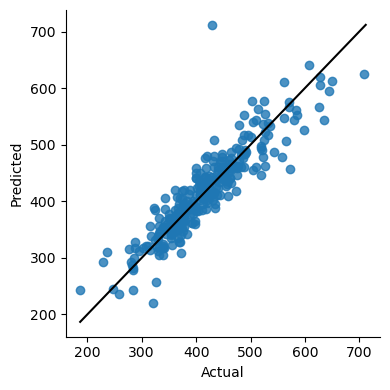

In [264]:
sns.lmplot(x = "Actual", y = "Predicted", data= df3, fit_reg=False, height=4)
d_line = np.arange(df3.min().min(), df3.max().max())
plt.plot(d_line,d_line,color="black", linestyle="-")
plt.show()

In [265]:
from sklearn.ensemble import GradientBoostingRegressor

In [266]:
final_model =  GradientBoostingRegressor()

In [267]:
final_model.fit(X3_train, Y3_train)

GradientBoostingRegressor()

In [268]:
test_pred = final_model.predict(test)

ValueError: X has 79 features, but GradientBoostingRegressor is expecting 40 features as input.

In [ ]:
R2_model = r2_score(Y3_test, Y3_pred_2)
R2_model